## Name: Erika Shrestha
## LondonMet ID: 23048598

#### Customer Service Request Analysis

This is a data analysis of the NYC 311 calls to understand the **pattern** in the data, identify **major complaints** filed against, and the **need trends** of customer which enhance **service handling** for different agency within the city.

***

***

In [1]:
#Import external library panda to read the csv file and to work with the dataframe
import pandas as pd
#import numpy to do numerical manipulation
import numpy as np
#Import datetime to check the timestamp of dataframe
from datetime import datetime
#import scipy for normal distribution calculation
from scipy.stats import skew
#import matplotlib for visualization
from matplotlib import pyplot as plt
#import seaborn to identify pattern through heatmap
import seaborn as sns
#import geopandas for geographical analysis
import geopandas as gpd
#import point to convert the spatial data
from shapely.geometry import Point
#import inbuilt datasets for map
import geodatasets
#import seasonal decompose to change the time series into meaningful pattern (trend, seasonal and noise)
from statsmodels.tsa.seasonal import seasonal_decompose, STL
#we import random to take some sample and then shapiro to check the p-value or normal distribution
import random
from scipy.stats import shapiro
#import stats from scipy to check the testings
from scipy import stats as stats
#import chi square testing library
from scipy.stats import chi2_contingency
#import warnings to ignore/hide unwanted warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#loading the NYC 311 calls dataset of customer service request
nyc_311_quality = pd.read_csv("NYC311_customer_service_request.csv", low_memory=False)

In [4]:
#Showing only top 10 rows to avoid clustering 
nyc_311_quality.head(10)

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   
5    32306554  12/31/2015 11:56:30 PM  01-01-16 1:50   NYPD   
6    32306559  12/31/2015 11:55:32 PM  01-01-16 1:53   NYPD   
7    32307009  12/31/2015 11:54:05 PM  01-01-16 1:42   NYPD   
8    32308581  12/31/2015 11:53:58 PM  01-01-16 8:27   NYPD   
9    32308391  12/31/2015 11:53:58 PM  01-01-16 1:17   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   
5  New York City Police Department          Illegal Parking   
6  New York City Police Department          Illegal Parking   
7  New York City Police Department         Blocked Driveway   
8  New York City Police Department          Illegal Parking   
9  New York City Police Department         Blocked Driveway   

                      Descriptor    Location Type  Incident Zip  \
0               Loud Music/Party  Street/Sidewalk       10034.0   
1                      No Access  Street/Sidewalk       11105.0   
2                      No Access  Street/Sidewalk       10458.0   
3   Commercial Overnight Parking  Street/Sidewalk       10461.0   
4               Blocked Sidewalk  Street/Sidewalk       11373.0   
5  Posted Parking Sign Violation  Street/Sidewalk       11215.0   
6                Blocked Hydrant  Street/Sidewalk       10032.0   
7                      No Access  Street/Sidewalk       10457.0   
8  Posted Parking Sign Violation  Street/Sidewalk       11415.0   
9                      No Access  Street/Sidewalk       11219.0   

           Incident Address         Street Name     Cross Street 1  \
0       71 VERMILYEA AVENUE    VERMILYEA AVENUE     ACADEMY STREET   
1           27-07 23 AVENUE           23 AVENUE          27 STREET   
2     2897 VALENTINE AVENUE    VALENTINE AVENUE    EAST 198 STREET   
3       2940 BAISLEY AVENUE      BAISLEY AVENUE      EDISON AVENUE   
4             87-14 57 ROAD             57 ROAD     SEABURY STREET   
5             260 21 STREET           21 STREET           5 AVENUE   
6       524 WEST 169 STREET     WEST 169 STREET   AMSTERDAM AVENUE   
7       501 EAST 171 STREET     EAST 171 STREET  WASHINGTON AVENUE   
8  83-44 LEFFERTS BOULEVARD  LEFFERTS BOULEVARD               BEND   
9            1408 66 STREET           66 STREET          14 AVENUE   

       Cross Street 2 Intersection Street 1 Intersection Street 2  \
0     WEST 204 STREET                   NaN                   NaN   
1           28 STREET                   NaN                   NaN   
2     EAST 199 STREET                   NaN                   NaN   
3            B STREET                   NaN                   NaN   
4       HOFFMAN DRIVE                   NaN                   NaN   
5            6 AVENUE                   NaN                   NaN   
6      AUDUBON AVENUE                   NaN                   NaN   
7            3 AVENUE                   NaN                   NaN   
8                BEND                   NaN                   NaN   
9  NEW UTRECHT AVENUE                   NaN                   NaN   

  Address Type         City Landmark Facility Type  Status       Due Date  \
0      ADDRESS     NEW YORK      NaN      Precinct  Closed  01-01-16 7:59   
1      ADDRESS      ASTORIA      NaN      Precinct  Closed  01-01-16 7:59   
2      ADDRESS        BRONX      NaN      Precinct  Closed  01-01-16 7:59   
3      ADDRESS        BRONX      NaN  

<div style="background-color: white">

#### Data Quality measure

***

**1. Consistency**

##### Date consistency check for closed date and created date columns

In [5]:
#The explicitly format type is shown to auto infer the formats individually
servreq_closed_date = pd.to_datetime(nyc_311_quality['Closed Date'], format = 'mixed') #Closed date column data are converted to datetime and stored in a variable
servreq_created_date = pd.to_datetime(nyc_311_quality['Created Date'], format = 'mixed') #Created date column data are converted to datetime and stored in a variable

In [6]:
#condition: closed date must appear only after created date to be true
compare_date = servreq_closed_date > servreq_created_date 

In [7]:
compare_date = compare_date.map({True:'Closed date greater', False:'Closed date smaller'})
nyc_311_quality.groupby(compare_date).size()

Closed date greater    298534
Closed date smaller      2164
dtype: int64

In [8]:
nyc_311_quality.shape #(row, column)

(300698, 53)

<div style="background-color: #d4edda; font-size: 13px">: This test compared <b>closed date</b> and <b>created date</b> columns to check the consistency. The analysis shows that around 99% of data has closed date greater than created date that indicates service request closed . However, the other 1% suggests the closed date being earlier than the created date which is logically incorrect.</div>

<div style="background-color: none"></div>

**2. Completeness**

**Missing value check in columns of data**

In [9]:
#to check total missing values in the columns 
column_null_value = nyc_311_quality.isna().sum()

In [10]:
#To identify columns with no missing values 
column_null_value[column_null_value == 0]

Unique Key                0
Created Date              0
Agency                    0
Agency Name               0
Complaint Type            0
Status                    0
Resolution Description    0
Community Board           0
Borough                   0
Park Facility Name        0
Park Borough              0
School Name               0
School Number             0
School Phone Number       0
School Address            0
School City               0
School State              0
School Not Found          0
dtype: int64

<div style="background-color: #d4edda; font-size: 13px">The 18 columns listed above have been identified as complete because they do not have any null values within them.</div>

In [11]:
column_null_value[column_null_value > 0]

Closed Date                         2164
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Due Date                               3
Resolution Action Updated Date      2187
X Coordinate (State Plane)          3540
Y Coordinate (State Plane)          3540
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      300698
Vehicle Type                      300698
Taxi Company Borough              300698
Taxi Pick Up Loc

In [12]:
# the highest number of missing values in a column using max function
column_null_value[column_null_value > 0].max()

np.int64(300698)

In [13]:
# the lowest number of missing values in a column using min function
column_null_value[column_null_value > 0].min()

np.int64(1)

In [14]:
"""To check the proportion of missing values in every column from the mean"""
mean_null_value = nyc_311_quality.isnull().mean()
highest_null_value = mean_null_value.sort_values(ascending = False)

In [15]:
highest_null_value.head(6)

Vehicle Type                    1.000000
Garage Lot Name                 1.000000
School or Citywide Complaint    1.000000
Taxi Pick Up Location           1.000000
Taxi Company Borough            1.000000
Ferry Direction                 0.999997
dtype: float64

<div style="background-color: #d4edda; font-size: 13px">We can conclude that 5 columns are considered "empty columns" due to the fact that they have 1.0 (100%) mean which means they only have missing values as their data. </div>

<div style="background-color: none"></div>

**3. Uniqueness**

**Duplicate data check**

In [16]:
#to check duplicate in every values of primary identifier column
nyc_311_quality['Unique Key'].duplicated().value_counts()

Unique Key
False    300698
Name: count, dtype: int64

<div style="background-color: #d4edda; font-size: 13px">All values of unique key column returns boolean false which indicates that no duplicate value is seen. This ensures all individual rows are unique considering its constraint as <b>primary key</b> (Unique).</div>

<div style="background-color: none"></div>

**4. Timeliness**

**Checking the age of data**

In [17]:
latest_complaint = servreq_closed_date.max()

In [18]:
latest_complaint

Timestamp('2016-01-03 16:22:00')

In [19]:
now = datetime.now()

In [20]:
now

datetime.datetime(2025, 5, 14, 14, 20, 44, 214014)

In [21]:
date_recorded_gap = now - latest_complaint

In [22]:
date_recorded_gap

Timedelta('3418 days 21:58:44.214014')

<div style="background-color: #d4edda; font-size: 13px">The most latest complaint filed by a customer to NYC 311 is said be in <b>2016</b> which is almost <b>3386</b> days old from the current year <b>2025</b>. This means that the data is outdated and might be unsuitable for real-time analysis.</div>

<div style="background-color: none"></div>

**5. Accuracy**

In [23]:
nyc_311_quality['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

<div style="background-color: #d4edda; font-size: 13px">The <b>5 borough</b> for NYC has been correctly used where the 6th one is considered unspecified could be a missing value.</div>

<div style="background-color: none"></div>

**5. Validity**

In [24]:
nyc_311_quality['Closed Date'].unique()

array(['01-01-16 0:55', '01-01-16 1:26', '01-01-16 4:51', ...,
       '03/29/2015 02:33:59 AM', '03/29/2015 04:38:35 AM',
       '03/29/2015 04:41:50 AM'], shape=(237166,), dtype=object)

<div style="background-color: #d4edda; font-size: 13px">The <b>Closed Date</b> have inconsistent format where some have format like <b>m/d/Y with PM/AM</b> whereas others have <b>d-m-y without PM/AM</b>.</div>

***

<p><b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></p>

# Data Preparation

-   <div style="font-size : 20px"><p><b>Import the dataset</b></p></div>

In [3]:
#load the dataset again in variable "nyc_311" to transform and analyze data
nyc_311 = pd.read_csv("NYC311_customer_service_request.csv", low_memory = False)

In [3]:
nyc_311

Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1         32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2         32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3         32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4         32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
...            ...                     ...                     ...    ...   
300693    30281872  03/29/2015 12:33:41 AM                     NaN   NYPD   
300694    30281230  03/29/2015 12:33:28 AM  03/29/2015 02:33:59 AM   NYPD   
300695    30283424  03/29/2015 12:33:03 AM  03/29/2015 03:40:20 AM   NYPD   
300696    30280004  03/29/2015 12:33:02 AM  03/29/2015 04:38:35 AM   NYPD   
300697    30281825  03/29/2015 12:33:01 AM  03/29/2015 04:41:50 AM   NYPD   

                            Agency Name           Complaint Type  \
0       New York City Police Department  Noise - Street/Sidewalk   
1       New York City Police Department         Blocked Driveway   
2       New York City Police Department         Blocked Driveway   
3       New York City Police Department          Illegal Parking   
4       New York City Police Department          Illegal Parking   
...                                 ...                      ...   
300693  New York City Police Department       Noise - Commercial   
300694  New York City Police Department         Blocked Driveway   
300695  New York City Police Department       Noise - Commercial   
300696  New York City Police Department       Noise - Commercial   
300697  New York City Police Department       Noise - Commercial   

                          Descriptor        Location Type  Incident Zip  \
0                   Loud Music/Party      Street/Sidewalk       10034.0   
1                          No Access      Street/Sidewalk       11105.0   
2                          No Access      Street/Sidewalk       10458.0   
3       Commercial Overnight Parking      Street/Sidewalk       10461.0   
4                   Blocked Sidewalk      Street/Sidewalk       11373.0   
...                              ...                  ...           ...   
300693              Loud Music/Party  Club/Bar/Restaurant           NaN   
300694                Partial Access      Street/Sidewalk       11418.0   
300695              Loud Music/Party  Club/Bar/Restaurant       11206.0   
300696              Loud Music/Party  Club/Bar/Restaurant       10461.0   
300697              Loud Music/Party     Store/Commercial       10036.0   

                Incident Address  ... Bridge Highway Name  \
0            71 VERMILYEA AVENUE  ...                 NaN   
1                27-07 23 AVENUE  ...                 NaN   
2          2897 VALENTINE AVENUE  ...                 NaN   
3            2940 BAISLEY AVENUE  ...                 NaN   
4                  87-14 57 ROAD  ...                 NaN   
...                          ...  ...                 ...   
300693           CRESCENT AVENUE  ...                 NaN   
300694          100-17 87 AVENUE  ...                 NaN   
300695         162 THROOP AVENUE  ...                 NaN   
300696  3151 EAST TREMONT AVENUE  ...                 NaN   
300697        251 WEST 48 STREET  ...                 NaN   

       Bridge Highway Direction Road Ramp Bridge Highway Segment  \
0                           NaN       NaN                    NaN   
1                           NaN       NaN                    NaN   
2                           NaN       NaN                    NaN   
3                           NaN       NaN                    NaN   
4                           NaN       NaN                    NaN   
...                         ...       ...                    ...   
300693                      NaN       NaN                    NaN   
300694                      NaN       NaN                    NaN   
300695              

In [4]:
nyc_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

<div style="background-color: none"></div>

<div style="background-color: none"></div>

-   <div style="font-size : 20px"><p><b>Convert column to Date type : Datetime <br> AND New column as time elapsed between request creation and request closing</b></p></div>

In [4]:
#converting the column indices : 1 and 2 
nyc_311['Created Date'] = pd.to_datetime(nyc_311['Created Date'], format = 'mixed') #object to datetime 
nyc_311['Closed Date'] = pd.to_datetime(nyc_311['Closed Date'], format = 'mixed') #object to datetime

In [5]:
#Checking whether the columns have been parsed
nyc_311[['Created Date','Closed Date']].dtypes

Created Date    datetime64[ns]
Closed Date     datetime64[ns]
dtype: object

<div style="background-color: #d4edda; font-size: 13px">The <b>Created Date</b> and <b>Closed Date</b> columns have been successfully converted to datatype 64-bit datetime in nanoseconds</div>

<div style="background-color: none"></div>

- <div font-size: 13px"><b>New Column : Requested_Closing_Time</b></div>

In [6]:
#time elapse can be calculated from the difference between created date and closed date
nyc_311['Requested_Closing_Time'] = nyc_311['Closed Date'] - nyc_311['Created Date']

In [8]:
nyc_311

Unique Key        Created Date         Closed Date Agency  \
0         32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1         32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2         32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3         32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4         32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   
...            ...                 ...                 ...    ...   
300693    30281872 2015-03-29 00:33:41                 NaT   NYPD   
300694    30281230 2015-03-29 00:33:28 2015-03-29 02:33:59   NYPD   
300695    30283424 2015-03-29 00:33:03 2015-03-29 03:40:20   NYPD   
300696    30280004 2015-03-29 00:33:02 2015-03-29 04:38:35   NYPD   
300697    30281825 2015-03-29 00:33:01 2015-03-29 04:41:50   NYPD   

                            Agency Name           Complaint Type  \
0       New York City Police Department  Noise - Street/Sidewalk   
1       New York City Police Department         Blocked Driveway   
2       New York City Police Department         Blocked Driveway   
3       New York City Police Department          Illegal Parking   
4       New York City Police Department          Illegal Parking   
...                                 ...                      ...   
300693  New York City Police Department       Noise - Commercial   
300694  New York City Police Department         Blocked Driveway   
300695  New York City Police Department       Noise - Commercial   
300696  New York City Police Department       Noise - Commercial   
300697  New York City Police Department       Noise - Commercial   

                          Descriptor        Location Type  Incident Zip  \
0                   Loud Music/Party      Street/Sidewalk       10034.0   
1                          No Access      Street/Sidewalk       11105.0   
2                          No Access      Street/Sidewalk       10458.0   
3       Commercial Overnight Parking      Street/Sidewalk       10461.0   
4                   Blocked Sidewalk      Street/Sidewalk       11373.0   
...                              ...                  ...           ...   
300693              Loud Music/Party  Club/Bar/Restaurant           NaN   
300694                Partial Access      Street/Sidewalk       11418.0   
300695              Loud Music/Party  Club/Bar/Restaurant       11206.0   
300696              Loud Music/Party  Club/Bar/Restaurant       10461.0   
300697              Loud Music/Party     Store/Commercial       10036.0   

                Incident Address  ... Bridge Highway Direction Road Ramp  \
0            71 VERMILYEA AVENUE  ...                      NaN       NaN   
1                27-07 23 AVENUE  ...                      NaN       NaN   
2          2897 VALENTINE AVENUE  ...                      NaN       NaN   
3            2940 BAISLEY AVENUE  ...                      NaN       NaN   
4                  87-14 57 ROAD  ...                      NaN       NaN   
...                          ...  ...                      ...       ...   
300693           CRESCENT AVENUE  ...                      NaN       NaN   
300694          100-17 87 AVENUE  ...                      NaN       NaN   
300695         162 THROOP AVENUE  ...                      NaN       NaN   
300696  3151 EAST TREMONT AVENUE  ...                      NaN       NaN   
300697        251 WEST 48 STREET  ...                      NaN       NaN   

       Bridge Highway Segment Garage Lot Name Ferry Direction  \
0                         NaN             NaN             NaN   
1                         NaN             NaN             NaN   
2                         NaN             NaN             NaN   
3                         NaN             NaN             NaN   
4                         NaN             NaN             NaN   
...                       ...             ...             ...   
300693                    NaN             NaN             NaN   
300694                    Na

<div style="background-color: none"></div>

In [7]:
#To check how many actual value is stored
nyc_311['Requested_Closing_Time'].value_counts().sum()

np.int64(298534)

In [8]:
#checks missing value NAT (not a time) presents in the new column
nyc_311['Requested_Closing_Time'].isna().sum()

np.int64(2164)

In [9]:
#datatype of new column
nyc_311['Requested_Closing_Time'].dtype

dtype('<m8[ns]')

<div style="background-color: #d4edda; font-size: 13px">The <b>Request Closing Time</b> columns have been successfully updated to datatype 64-bit timedelta in nanoseconds as the time taken to fulfill the customer request.</div>

<div style="background-color: none"></div>

<div style="background-color: none"></div>

-   <div style="font-size : 20px"><p><b>Drop 39 columns to handle empty columns</b></p></div>

In [7]:
#the column is dropped in 3 steps
#the slicing is used where first slice is for all rows and the columns are filtered out using loc (label-based data access)
#Inplace helps to permanently save the changes made to the dataframe
#both start and stop is inclusive in loc unlike iloc (index-based data access)
nyc_311.drop(columns=nyc_311.loc[:, 'Incident Address':'Address Type'].columns, inplace = True)
nyc_311.drop(columns=nyc_311.loc[:,'X Coordinate (State Plane)':'Ferry Terminal Name'].columns, inplace = True)
nyc_311.drop(columns=['Agency Name','Landmark','Due Date','Resolution Action Updated Date','Community Board','Facility Type','Location'], inplace = True)

In [10]:
nyc_311

Unique Key        Created Date         Closed Date Agency  \
0         32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1         32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2         32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3         32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4         32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   
...            ...                 ...                 ...    ...   
300693    30281872 2015-03-29 00:33:41                 NaT   NYPD   
300694    30281230 2015-03-29 00:33:28 2015-03-29 02:33:59   NYPD   
300695    30283424 2015-03-29 00:33:03 2015-03-29 03:40:20   NYPD   
300696    30280004 2015-03-29 00:33:02 2015-03-29 04:38:35   NYPD   
300697    30281825 2015-03-29 00:33:01 2015-03-29 04:41:50   NYPD   

                 Complaint Type                    Descriptor  \
0       Noise - Street/Sidewalk              Loud Music/Party   
1              Blocked Driveway                     No Access   
2              Blocked Driveway                     No Access   
3               Illegal Parking  Commercial Overnight Parking   
4               Illegal Parking              Blocked Sidewalk   
...                         ...                           ...   
300693       Noise - Commercial              Loud Music/Party   
300694         Blocked Driveway                Partial Access   
300695       Noise - Commercial              Loud Music/Party   
300696       Noise - Commercial              Loud Music/Party   
300697       Noise - Commercial              Loud Music/Party   

              Location Type  Incident Zip           City  Status  \
0           Street/Sidewalk       10034.0       NEW YORK  Closed   
1           Street/Sidewalk       11105.0        ASTORIA  Closed   
2           Street/Sidewalk       10458.0          BRONX  Closed   
3           Street/Sidewalk       10461.0          BRONX  Closed   
4           Street/Sidewalk       11373.0       ELMHURST  Closed   
...                     ...           ...            ...     ...   
300693  Club/Bar/Restaurant           NaN            NaN    Open   
300694      Street/Sidewalk       11418.0  RICHMOND HILL  Closed   
300695  Club/Bar/Restaurant       11206.0       BROOKLYN  Closed   
300696  Club/Bar/Restaurant       10461.0          BRONX  Closed   
300697     Store/Commercial       10036.0       NEW YORK  Closed   

                                   Resolution Description      Borough  \
0       The Police Department responded and upon arriv...    MANHATTAN   
1       The Police Department responded to the complai...       QUEENS   
2       The Police Department responded and upon arriv...        BRONX   
3       The Police Department responded to the complai...        BRONX   
4       The Police Department responded and upon arriv...       QUEENS   
...                                                   ...          ...   
300693  Your complaint has been forwarded to the New Y...  Unspecified   
300694  The Police Department responded and upon arriv...       QUEENS   
300695  The Police Department responded to the complai...     BROOKLYN   
300696  The Police Department responded to the complai...        BRONX   
300697  The Police Department responded to the complai...    MANHATTAN   

         Latitude  Longitude Requested_Closing_Time  
0       40.865682 -73.923501        0 days 00:55:15  
1       40.775945 -73.915094        0 days 01:26:16  
2       40.870325 -73.888525        0 days 04:51:31  
3       40.835994 -73.828379        0 days 07:45:14  
4       40.733060 -73.874170        0 days 03:27:02  
...           ...        ...                    ...  
300693        NaN        NaN                    NaT  
300694  40.694077 -73.846087        0 days 02:00:31  
300695  40.699590 -73.944234        0 days 03:07:17  
300696  40.837708 -73.834587        0 days 04:05:33  
300697  40.760583 -73.985922        0 days 04:08:49  

[300698 rows x 15 columns]

<div style="background-color: none"></div>

<div style="background-color: none"></div>

-   <div style="font-size : 20px"><p><b>Filter out Missing values from the updated dataframe</b></p></div>

In [8]:
#the rows with atleast 1 NaN value will be deleted
nyc_311.dropna(inplace = True)

In [12]:
nyc_311

Unique Key        Created Date         Closed Date Agency  \
0         32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1         32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2         32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3         32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4         32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   
...            ...                 ...                 ...    ...   
300692    30281370 2015-03-29 00:34:32 2015-03-29 01:13:01   NYPD   
300694    30281230 2015-03-29 00:33:28 2015-03-29 02:33:59   NYPD   
300695    30283424 2015-03-29 00:33:03 2015-03-29 03:40:20   NYPD   
300696    30280004 2015-03-29 00:33:02 2015-03-29 04:38:35   NYPD   
300697    30281825 2015-03-29 00:33:01 2015-03-29 04:41:50   NYPD   

                 Complaint Type                    Descriptor  \
0       Noise - Street/Sidewalk              Loud Music/Party   
1              Blocked Driveway                     No Access   
2              Blocked Driveway                     No Access   
3               Illegal Parking  Commercial Overnight Parking   
4               Illegal Parking              Blocked Sidewalk   
...                         ...                           ...   
300692       Noise - Commercial              Loud Music/Party   
300694         Blocked Driveway                Partial Access   
300695       Noise - Commercial              Loud Music/Party   
300696       Noise - Commercial              Loud Music/Party   
300697       Noise - Commercial              Loud Music/Party   

              Location Type  Incident Zip           City  Status  \
0           Street/Sidewalk       10034.0       NEW YORK  Closed   
1           Street/Sidewalk       11105.0        ASTORIA  Closed   
2           Street/Sidewalk       10458.0          BRONX  Closed   
3           Street/Sidewalk       10461.0          BRONX  Closed   
4           Street/Sidewalk       11373.0       ELMHURST  Closed   
...                     ...           ...            ...     ...   
300692     Store/Commercial       10002.0       NEW YORK  Closed   
300694      Street/Sidewalk       11418.0  RICHMOND HILL  Closed   
300695  Club/Bar/Restaurant       11206.0       BROOKLYN  Closed   
300696  Club/Bar/Restaurant       10461.0          BRONX  Closed   
300697     Store/Commercial       10036.0       NEW YORK  Closed   

                                   Resolution Description    Borough  \
0       The Police Department responded and upon arriv...  MANHATTAN   
1       The Police Department responded to the complai...     QUEENS   
2       The Police Department responded and upon arriv...      BRONX   
3       The Police Department responded to the complai...      BRONX   
4       The Police Department responded and upon arriv...     QUEENS   
...                                                   ...        ...   
300692  The Police Department responded to the complai...  MANHATTAN   
300694  The Police Department responded and upon arriv...     QUEENS   
300695  The Police Department responded to the complai...   BROOKLYN   
300696  The Police Department responded to the complai...      BRONX   
300697  The Police Department responded to the complai...  MANHATTAN   

         Latitude  Longitude Requested_Closing_Time  
0       40.865682 -73.923501        0 days 00:55:15  
1       40.775945 -73.915094        0 days 01:26:16  
2       40.870325 -73.888525        0 days 04:51:31  
3       40.835994 -73.828379        0 days 07:45:14  
4       40.733060 -73.874170        0 days 03:27:02  
...           ...        ...                    ...  
300692  40.716053 -73.991378        0 days 00:38:29  
300694  40.694077 -73.846087        0 days 02:00:31  
300695  40.699590 -73.944234        0 days 03:07:17  
300696  40.837708 -73.834587        0 days 04:05:33  
300697  40.760583 -73.985922        0 days 04:08:49  

[291107 rows x 15 columns]

<div style="background-color: #d4edda; font-size: 13px">After dropping all missing values the rows were reducted from <b>300698</b> to  <b>291107</b></div>

In [17]:
#Checking if all missing values have been removed from all columns
nyc_311.isna().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Requested_Closing_Time    0
dtype: int64

<div style="background-color: #d4edda; font-size: 13px">The missing values have been <b>successfully</b> removed.</b></div>

<div style="background-color: none"></div>

<div style="background-color: none"></div>

-   <div style="font-size : 20px"><p><b>Display unique values of all columns in the dataframe</b></p></div>

In [9]:
def allcol_unique_value():
    for columns in nyc_311.columns:
        print(f"\033[1m{columns}\033[0m :\n {nyc_311[columns].unique()}\n")

allcol_unique_value()

Unique Key :
 [32310363 32309934 32309159 ... 30283424 30280004 30281825]

Created Date :
 <DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]

Closed Date :
 <DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00', '2016-01-01 01:50:00',
 '2016-01-01 01:53:00', '2016-01-01 01:42:00', '2016-01-01 08:27:00',
 '2016-01-01 01:17:00',
 ...
 '2015-03-29 00:57:23', '2015-03-29 02:57:41', '2015-03-29 01:02:39',
 '2015-03-29 04:14:27', '2015-03-29 08:41

In [10]:
def allcol_nunique_value():
    for columns in nyc_311.columns:
        print(f"\033[1m{columns}\033[0m :\n {nyc_311[columns].nunique()}\n")

allcol_nunique_value()

Unique Key :
 291107

Created Date :
 251970

Closed Date :
 231991

Agency :
 1

Complaint Type :
 15

Descriptor :
 41

Location Type :
 14

Incident Zip :
 200

City :
 53

Status :
 1

Resolution Description :
 12

Borough :
 5

Latitude :
 123013

Longitude :
 123112

Requested_Closing_Time :
 47134



<div style="background-color: #d4edda; font-size: 13px">The unique values and its total number is displayed where <b>Created date</b> has most unique values apart from unique key.</div>

<div style="background-color: none"></div>

<div style="background-color: none"></div>

# Data Analysis

-   <div style="font-size : 20px"><p><b>Display Summary Statistics of the dataframe</b></p></div>

In [11]:
#summary statistics of numerical data
nyc_311.select_dtypes(include="number").describe()

Unique Key   Incident Zip       Latitude      Longitude  \
count  2.911070e+05  291107.000000  291107.000000  291107.000000   
mean   3.130158e+07   10857.977349      40.725681     -73.925035   
std    5.753777e+05     580.280774       0.082411       0.078654   
min    3.027948e+07      83.000000      40.499135     -74.254937   
25%    3.079934e+07   10314.000000      40.668926     -73.970957   
50%    3.130675e+07   11209.000000      40.717782     -73.930774   
75%    3.179091e+07   11238.000000      40.782973     -73.875788   
max    3.231065e+07   11697.000000      40.912869     -73.700760   

          Requested_Closing_Time  
count                     291107  
mean   0 days 04:18:32.132665995  
std    0 days 06:03:45.509089128  
min              0 days 00:01:00  
25%              0 days 01:16:30  
50%              0 days 02:42:38  
75%              0 days 05:20:24  
max             24 days 16:52:22

<div style="background-color: #d4edda; font-size: 13px">The unique values and its total number is displayed where <b>Created date</b> has most unique values apart from unique key.</div>

In [12]:
#the sum functions shows total sum of values of all numeric columns
nyc_311.select_dtypes(include="number").sum()

Unique Key                      9112107955295
Incident Zip                     3160833212.0
Latitude                      11855530.758778
Longitude                    -21520095.167682
Requested_Closing_Time    52264 days 22:26:44
dtype: object

<div style="background-color: #d4edda; font-size: 13px">The statistical <b>Sum</b> of all columns.</div>

<div style="background-color: none"></div>

-   <div style="font-size : 15px"><p><b>Skewness</b></p></div>

In [91]:
#Store only numeric columns in a variable "numeric_columns"
#excluding unique keys to avoid calculating its skewness as they are considered as identifiers.
numeric_columns = nyc_311.select_dtypes(include="number").drop(columns=['Unique Key'])

In [92]:
#update the requested closing time with data type as int by converting to days from timedelta 
numeric_columns['Requested_Closing_Time'] = numeric_columns['Requested_Closing_Time'].dt.total_seconds()

In [93]:
#check successful conversion of datatype
type(numeric_columns['Requested_Closing_Time'][0])

numpy.float64

In [94]:
#the skewness shows the dispersion of data in a dataset
numeric_columns.skew()

Incident Zip              -2.553956
Latitude                   0.123114
Longitude                 -0.312739
Requested_Closing_Time    14.299525
dtype: float64

<div style="background-color: #d4edda; font-size: 13px">Columns like <b>Latitude, Requested_Closing_Time</b> has <b>positive skew (right-tailed)</b> because <b>skew > 0</b> and <b>Incident zip, longitude</b> have <b>negative skew (left-tailed)</b> as <b>skew < 0</b>.</div>

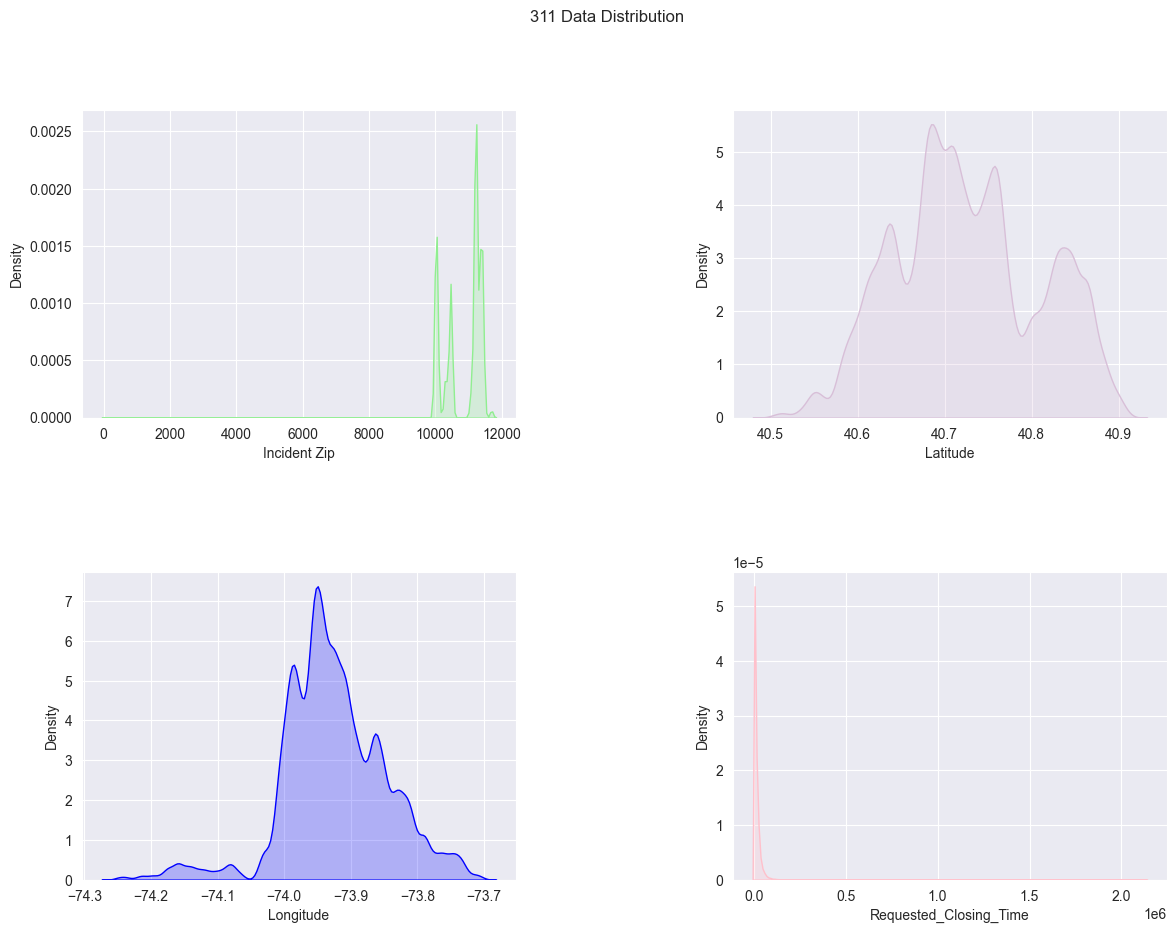

In [95]:
#To show visual data distribution of each table with their skewness
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.kdeplot(numeric_columns['Incident Zip'], shade=True, color="lightgreen")
plt.subplot(2,2,2)
sns.kdeplot(numeric_columns['Latitude'], shade=True, color="#D8BFD8")
plt.subplot(2,2,3)
sns.kdeplot(numeric_columns['Longitude'], shade=True, color="blue")
plt.subplot(2,2,4)
sns.kdeplot(numeric_columns['Requested_Closing_Time'], shade=True, color="pink")
plt.subplots_adjust(wspace=0.5, hspace=0.5) 
plt.suptitle("311 Data Distribution")
plt.show()

-   <div style="font-size : 15px"><p><b>Kurtosis</b></p></div>

In [20]:
#kurtosis shows the excessiveness of how the data is distributed
numeric_columns.kurt()

Incident Zip               37.827777
Latitude                   -0.734818
Longitude                   1.455600
Requested_Closing_Time    849.777081
dtype: float64

<div style="background-color: #d4edda; font-size: 13px">Columns like <b>Latitude</b> has <b>kurtosis <0</b> which means they are <b> platykurtic (light tails)</b> and <b>Incident zip, longitude, Requested closing time</b> has <b>kurtosis >0</b> that is <b>Leptokurtic (Heavy tails)</b>.</div>

<div style="background-color: none"></div>

<div style="background-color: none"></div>

-   <div style="font-size : 20px"><p><b>Display Correlation between variables</b></p></div>

In [97]:
#All correlation between columns are shown with use of corr function which selects only numeric values
#excluding unique keys to avoid calculating its correlation as they are considered as identifiers.
columns_correlation = nyc_311.select_dtypes(include = "number").drop(columns = ['Unique Key'])

In [98]:
#update the requested closing time with data type as int by converting to days from timedelta 
columns_correlation['Requested_Closing_Time'] = columns_correlation['Requested_Closing_Time'].dt.total_seconds()

In [99]:
columns_correlation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291107 entries, 0 to 300697
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident Zip            291107 non-null  float64
 1   Latitude                291107 non-null  float64
 2   Longitude               291107 non-null  float64
 3   Requested_Closing_Time  291107 non-null  float64
dtypes: float64(4)
memory usage: 19.2 MB


In [100]:
columns_correlation.corr()

Incident Zip  Latitude  Longitude  \
Incident Zip                1.000000 -0.499081   0.385934   
Latitude                   -0.499081  1.000000   0.368819   
Longitude                   0.385934  0.368819   1.000000   
Requested_Closing_Time      0.057182  0.024497   0.109724   

                        Requested_Closing_Time  
Incident Zip                          0.057182  
Latitude                              0.024497  
Longitude                             0.109724  
Requested_Closing_Time                1.000000

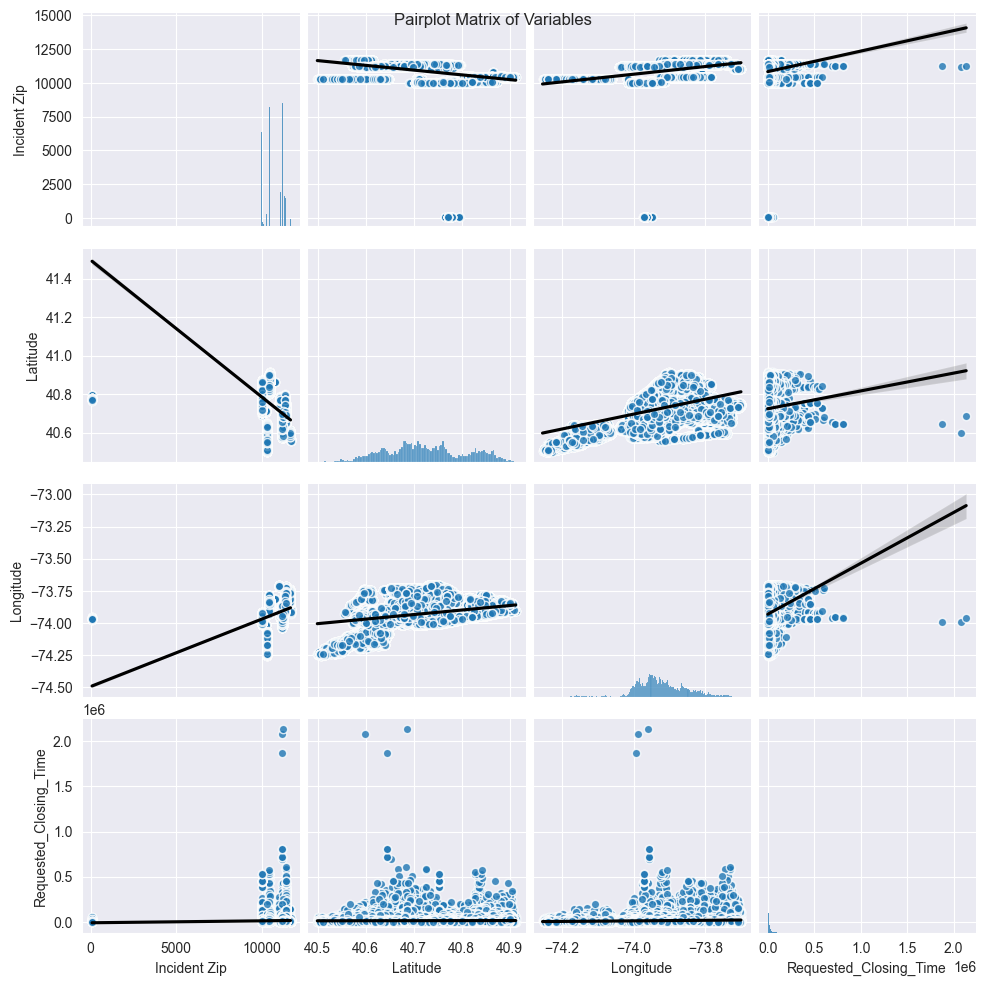

In [101]:
sns.set_style('darkgrid')
sns.pairplot(columns_correlation, kind='reg', plot_kws={'scatter_kws': {'edgecolor': 'white'}, 'line_kws': {'color': 'black'}})
plt.suptitle("Pairplot Matrix of Variables")
plt.show()

-   <div style="font-size : 15px"><p><b>Display Correlation between each variables</b></p></div>

In [73]:
#comparing columns which has correlation with requested closing time
columns_correlation['Requested_Closing_Time']

0          3315.0
1          5176.0
2         17491.0
3         27914.0
4         12422.0
           ...   
300692     2309.0
300694     7231.0
300695    11237.0
300696    14733.0
300697    14929.0
Name: Requested_Closing_Time, Length: 291107, dtype: float64

In [74]:
#assigning columns as values
x = columns_correlation['Requested_Closing_Time']
y1 = columns_correlation['Longitude']
y2 = columns_correlation['Latitude']
y3 = columns_correlation['Incident Zip']

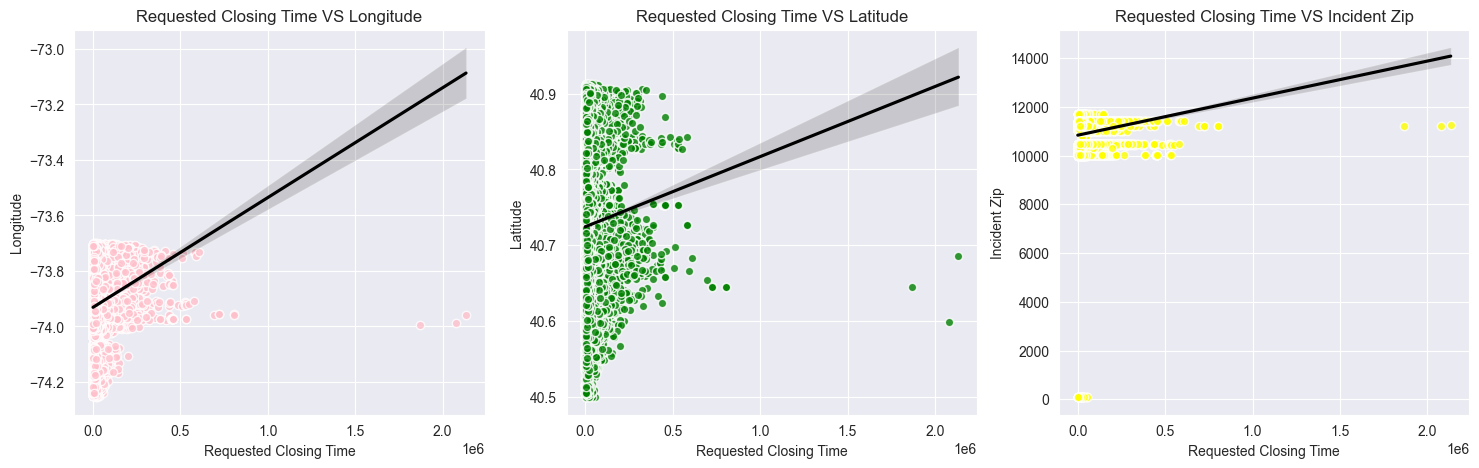

In [75]:
#scatter plot where X is "Requested closing time" and Y1, Y2, Y3
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.regplot(x=x,y=y1, color="pink", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Requested Closing Time VS Longitude")
plt.xlabel("Requested Closing Time")
plt.ylabel("Longitude")
plt.subplot(1,3,2)
sns.regplot(x=x,y=y2, color="green", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Requested Closing Time VS Latitude")
plt.xlabel("Requested Closing Time")
plt.ylabel("Latitude")
plt.subplot(1,3,3)
sns.regplot(x=x,y=y3, color="yellow", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Requested Closing Time VS Incident Zip")
plt.xlabel("Requested Closing Time")
plt.ylabel("Incident Zip")
plt.show()

<div style="background-color: #d4edda; font-size: 13px">Requested closing time column has a low degree positive correlation with <b>longitude</b> of <b>0.11</b> and followed by <b>Latitude</b> of <b>0.0245</b>.It is shown that no negative correlation exists with the requested closing time.</div>

In [76]:
#comparing columns which has correlation with longitude
columns_correlation['Longitude']

0        -73.923501
1        -73.915094
2        -73.888525
3        -73.828379
4        -73.874170
            ...    
300692   -73.991378
300694   -73.846087
300695   -73.944234
300696   -73.834587
300697   -73.985922
Name: Longitude, Length: 291107, dtype: float64

In [77]:
#assigning columns as values 
x = columns_correlation['Longitude']
y1 = columns_correlation['Requested_Closing_Time']
y2 = columns_correlation['Latitude']
y3 = columns_correlation['Incident Zip']

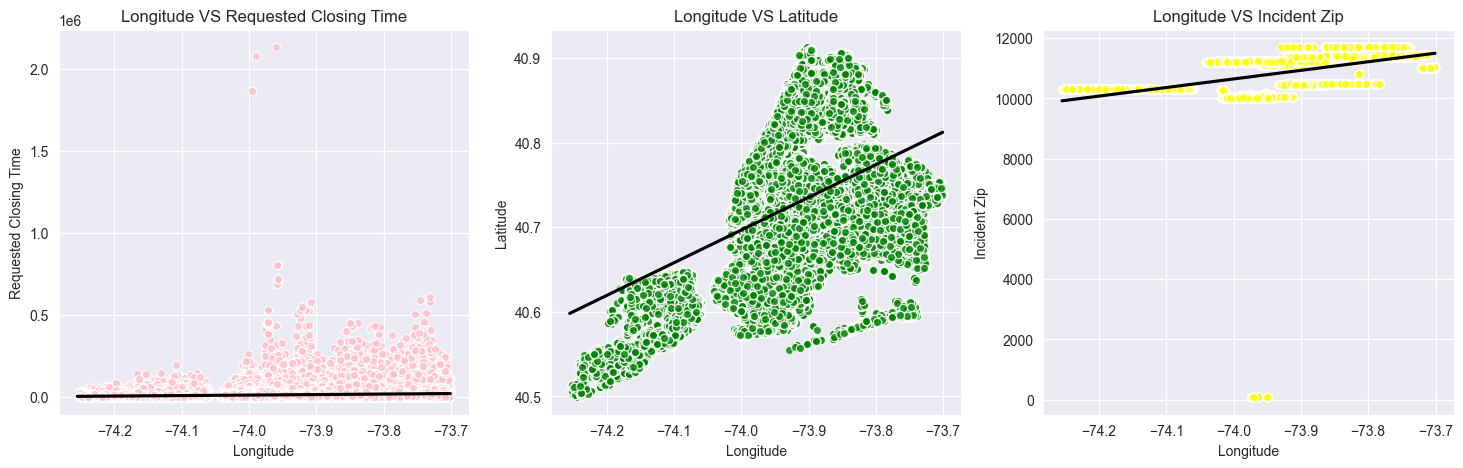

In [78]:
#scatter plot where X is "Longitude" and Y1, Y2, Y3
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.regplot(x=x,y=y1, color="pink", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Longitude VS Requested Closing Time")
plt.xlabel("Longitude")
plt.ylabel("Requested Closing Time")
plt.subplot(1,3,2)
sns.regplot(x=x,y=y2, color="green", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Longitude VS Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.subplot(1,3,3)
sns.regplot(x=x,y=y3, color="yellow", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Longitude VS Incident Zip")
plt.xlabel("Longitude")
plt.ylabel("Incident Zip")
plt.show()

<div style="background-color: #d4edda; font-size: 13px">Longitude column has a low degree positive correlation with <b>Incident Zip</b> of <b>0.386</b> followed by  positive correlation with <b>Requested closing time</b> of <b>0.11.</b></div>

In [79]:
#comparing columns which has correlation with Latitude
columns_correlation['Latitude']

0         40.865682
1         40.775945
2         40.870325
3         40.835994
4         40.733060
            ...    
300692    40.716053
300694    40.694077
300695    40.699590
300696    40.837708
300697    40.760583
Name: Latitude, Length: 291107, dtype: float64

In [80]:
#assigning columns as values 
x = columns_correlation['Latitude']
y1 = columns_correlation['Requested_Closing_Time']
y2 = columns_correlation['Longitude']
y3 = columns_correlation['Incident Zip']

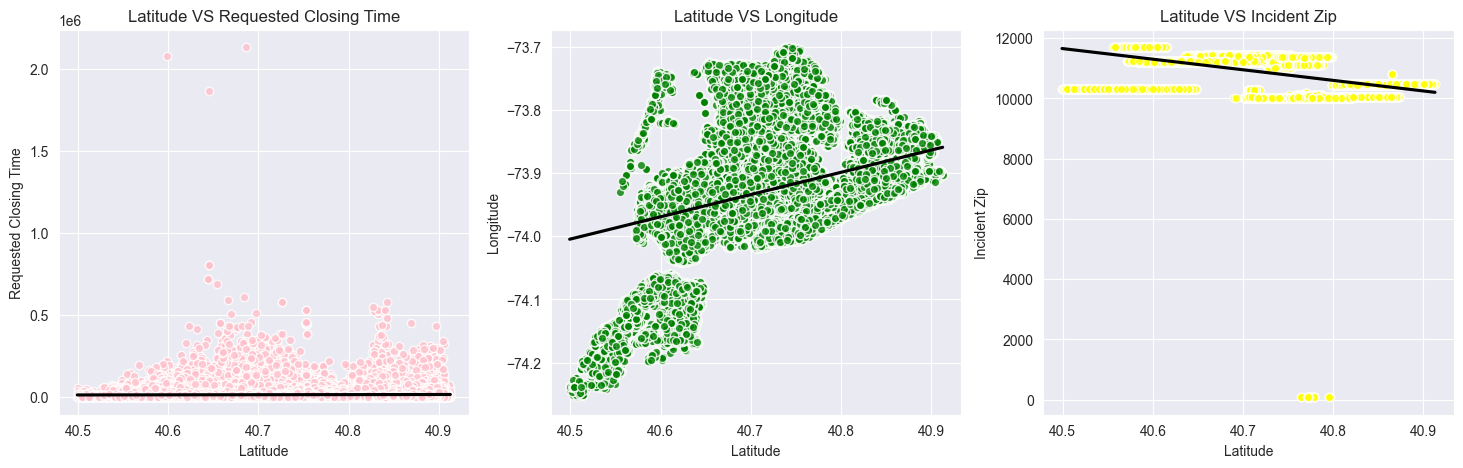

In [81]:
#scatter plot where X is "Latitude" and Y1, Y2, Y3
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.regplot(x=x,y=y1, color="pink", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Latitude VS Requested Closing Time")
plt.xlabel("Latitude")
plt.ylabel("Requested Closing Time")
plt.subplot(1,3,2)
sns.regplot(x=x,y=y2, color="green", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Latitude VS Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.subplot(1,3,3)
sns.regplot(x=x,y=y3, color="yellow", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Latitude VS Incident Zip")
plt.xlabel("Latitude")
plt.ylabel("Incident Zip")
plt.show()

<div style="background-color: #d4edda; font-size: 13px">Latitude column has a low degree positive correlation with <b>longitude</b> of <b>0.368</b> followed by<b>Requested closing time</b> of <b>0.0245</b>.It is shown that <b>Incident Zip</b> has low degree negative correlation of <b>-0.0326</b> and <b>-0.499</b> with the Latitude.</div>

In [87]:
#comparing columns which has correlation with incident zip
columns_correlation['Incident Zip']

0         10034.0
1         11105.0
2         10458.0
3         10461.0
4         11373.0
           ...   
300692    10002.0
300694    11418.0
300695    11206.0
300696    10461.0
300697    10036.0
Name: Incident Zip, Length: 291107, dtype: float64

In [88]:
#assigning columns as values
x = columns_correlation['Incident Zip']
y1 = columns_correlation['Requested_Closing_Time']
y2 = columns_correlation['Longitude']
y3 = columns_correlation['Latitude']

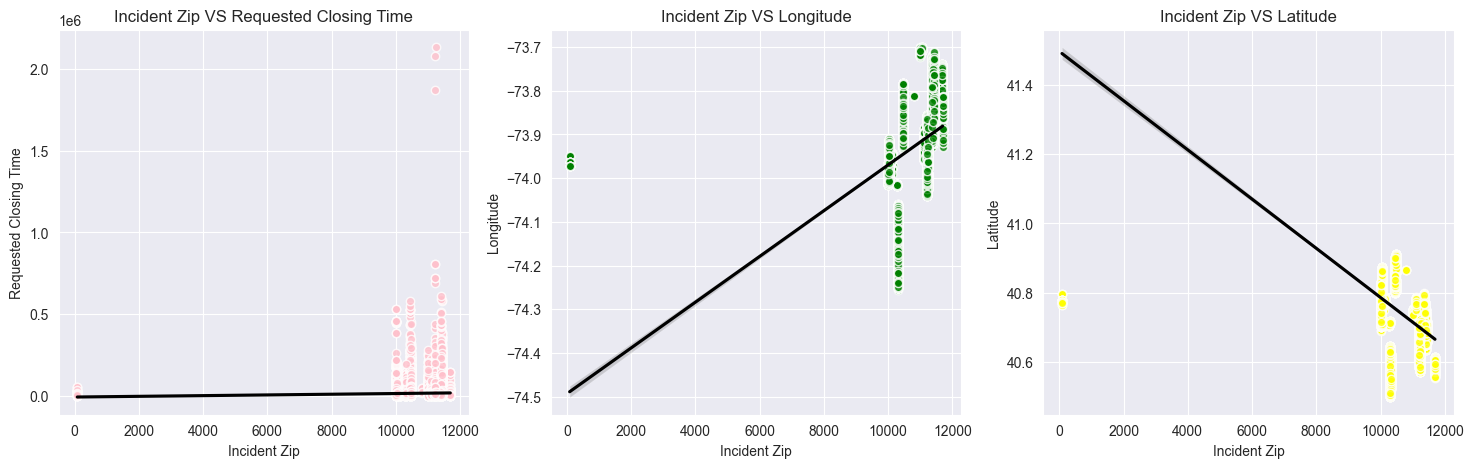

In [89]:
#scatter plot where X is "Incident Zip" and Y1, Y2, Y3
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.regplot(x=x,y=y1, color="pink", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Incident Zip VS Requested Closing Time")
plt.xlabel("Incident Zip")
plt.ylabel("Requested Closing Time")
plt.subplot(1,3,2)
sns.regplot(x=x,y=y2, color="green", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Incident Zip VS Longitude")
plt.xlabel("Incident Zip")
plt.ylabel("Longitude")
plt.subplot(1,3,3)
sns.regplot(x=x,y=y3, color="yellow", line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
plt.title("Incident Zip VS Latitude")
plt.xlabel("Incident Zip")
plt.ylabel("Latitude")
plt.show()

<div style="background-color: #d4edda; font-size: 13px"><b>Incident Zip</b> column has a low degree positive correlation with <b>longitude</b> of <b>0.368</b> followed by<b>Requested closing time</b> of <b>0.0245</b>.It is shown that <b>Incident Zip</b> has low degree negative correlation of <b>-0.0326</b> and <b>-0.499</b> with the Latitude.</div>

<div style="background-color: none"></div>

<div style="background-color: none"></div>

<div style="background-color: none"></div>

<p><b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></p>

# Data Exploration

## Insight 1: 

-   <div style="font-size : 20px"><p><b>NYC 311 SERVICE: Top 5 Complaints</b></p></div>

In [9]:
#To make a new dataframe which is copy and independent of nyc_311
nyc_311_trend = nyc_311.copy()

In [10]:
#counts the complaint types
complaint_counts = nyc_311_trend['Complaint Type'].value_counts()

In [11]:
#checking all complaints 
complaint_counts

Complaint Type
Blocked Driveway            76676
Illegal Parking             74021
Noise - Street/Sidewalk     47747
Noise - Commercial          35144
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4466
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: count, dtype: int64

In [16]:
#filtering onlt first 5 data row
top_five_complaints = complaint_counts.head(5)

In [17]:
#printing the top five complaints
top_five_complaints

Complaint Type
Blocked Driveway           76676
Illegal Parking            74021
Noise - Street/Sidewalk    47747
Noise - Commercial         35144
Derelict Vehicle           17506
Name: count, dtype: int64

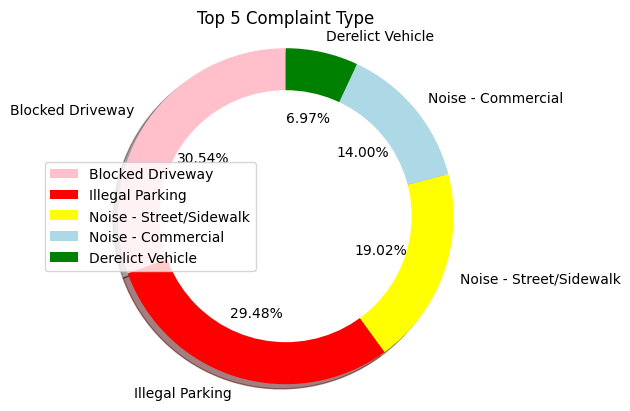

In [18]:
#plotting the pie-chart
plt.title("Top 5 Complaint Type")
plt.pie(x=top_five_complaints, labels = top_five_complaints.index, autopct='%.2f%%', shadow=True, startangle=90, colors=["pink","red",
                                                                                                                         "yellow","lightblue","green"])
plt.axis('equal')
plt.legend(loc='center left')

#donut chart
circle= plt.Circle(xy=(0,0), radius=.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

<div style="background-color: #d4edda; font-size: 13px">The dataset's top 5 complaint categories offer important insights into the issues that New York City people are worried about.<b> "Blocked Driveway"</b>  is the most frequent complaint, indicating parking issues that frequently interfere with residents' access to their houses. <b>"Illegal Parking"</b> rounds out the second out of five, emphasizing issues with vehicles parked in prohibited areas. <b>The "Noise - Street/Sidewalk"</b>  complaint which is the third common among them, indicating a general public worry over disturbances to the streets and sidewalks, including traffic, construction noise, and other urban noise followed by <b>Noise-commercial</b> and  <b>Derelict Vehicle</b></div>

## Insight 2: 

-   <div style="font-size : 20px"><p><b>Heat map : Days VS Complaint Type</b></p></div>

In [12]:
#Creating a new column in the dataframe to store the extracted day of the complaint date
nyc_311_trend['Day of week'] = nyc_311_trend['Created Date'].dt.day_name()

In [13]:
nyc_311_trend.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Requested_Closing_Time', 'Day of week'],
      dtype='object')

In [14]:
#to reorder the index into correct days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']

In [18]:
#to count the types of complaint appearing each day 
nyc_311_trend.groupby(['Day of week','Complaint Type'])['Unique Key'].count()[day_order]

Day of week  Complaint Type          
Sunday       Animal Abuse                  947
             Blocked Driveway            11070
             Derelict Vehicle             1587
             Disorderly Youth               42
             Drinking                      244
             Graffiti                       12
             Illegal Parking              9765
             Noise - Commercial           7723
             Noise - House of Worship      197
             Noise - Park                 1029
             Noise - Street/Sidewalk      9993
             Noise - Vehicle              3014
             Posting Advertisement          88
             Traffic                       313
             Vending                       309
Monday       Animal Abuse                 1195
             Blocked Driveway            11254
             Derelict Vehicle             3092
             Disorderly Youth               32
             Drinking                      147
             Graffiti 

In [19]:
#to check unique days of the week in the column "day of week"
nyc_311_trend['Day of week'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [20]:
#to store the number of complaints filed in individual day with multiindex format
daily_complaint_type = nyc_311_trend.groupby(['Day of week','Complaint Type'])['Unique Key'].size().unstack().fillna(0)

In [21]:
#use of transpose to change the day of week and complaint type axis
daily_complaint_type.T[day_order]

Day of week               Sunday  Monday  Tuesday  Wednesday  Thursday  \
Complaint Type                                                           
Animal Abuse                 947    1195     1160       1244      1123   
Blocked Driveway           11070   11254    11214      10564     11083   
Derelict Vehicle            1587    3092     2876       3006      2916   
Disorderly Youth              42      32       39         41        41   
Drinking                     244     147      142        149       144   
Graffiti                      12      24       19         18        21   
Illegal Parking             9765   11184    11489      10978     11204   
Noise - Commercial          7723    3244     3123       3624      4214   
Noise - House of Worship     197     106       91         87       109   
Noise - Park                1029     400      322        361       350   
Noise - Street/Sidewalk     9993    5237     4383       4851      5063   
Noise - Vehicle             3014    2126     1928       2037      2171   
Posting Advertisement         88      93       89        101       102   
Traffic                      313     513      670        769       914   
Vending                      309     507      524        596       571   

Day of week               Friday  Saturday  
Complaint Type                              
Animal Abuse                1096       979  
Blocked Driveway           10826     10665  
Derelict Vehicle            2442      1587  
Disorderly Youth              51        39  
Drinking                     202       242  
Graffiti                      11         8  
Illegal Parking            10771      8630  
Noise - Commercial          5415      7801  
Noise - House of Worship     119       211  
Noise - Park                 436      1029  
Noise - Street/Sidewalk     7129     11091  
Noise - Vehicle             2636      2956  
Posting Advertisement         84        90  
Traffic                      797       490  
Vending                      682       584

In [26]:
#Storing the data into a variable
daily_complaint_type = daily_complaint_type.T[day_order]

Text(0.5, 1.0, 'Heatmap of Complaint Types by Day')

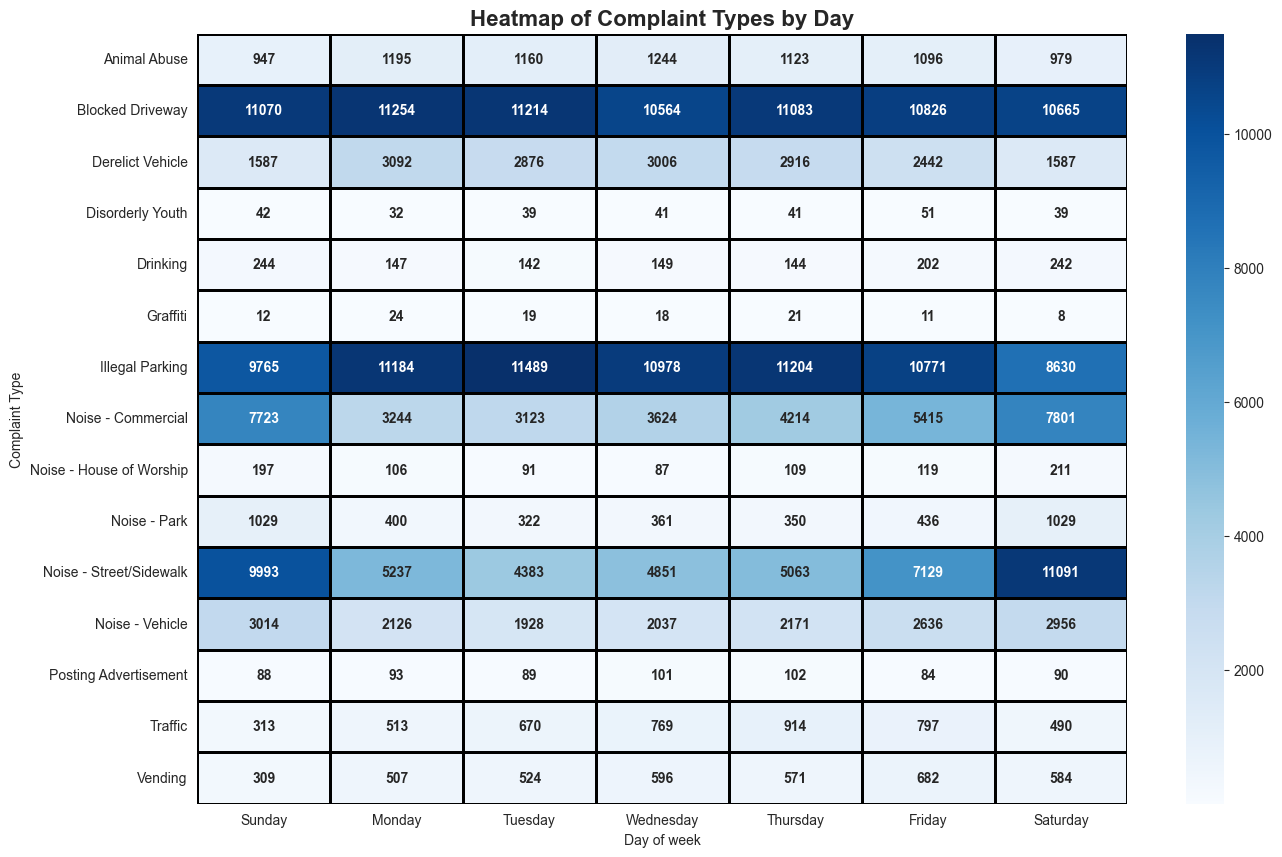

In [139]:
#use of seaborn to make a heatmap to identify patterns of complaint types on the basis of days
plt.figure(figsize=(15, 10)) 
sns.heatmap(daily_complaint_type, cmap='Blues', annot=True, fmt=".0f", 
            linewidth=1, linecolor='black',annot_kws={'fontsize': 10, 'fontweight': 'bold'});
plt.title('Heatmap of Complaint Types by Day', fontsize=16, fontweight='bold')

<div style="background-color: #d4edda; font-size: 13px">The heatmap shows clear daily trends in the kinds of complaints. The number of complaints about blocked driveways and illegal parking is still high (between 8,600 and 11,500 per day), with occasional decreases on weekends. The noise street are seen in the peak during saturdays could be because of weekend and crowd. The blocked driveways may prevail due to church on sundays.</div>

<div style="background-color: none"></div>

## Insight 3: 

-   <div style="font-size : 20px"><p><b>Borough: Major Complaint Type</b></p></div>

In [41]:
#use of geodataframe to store the longitude and latitude into points 
nyc_311_geog= gpd.GeoDataFrame(nyc_311, geometry = gpd.points_from_xy(
    nyc_311.Longitude, nyc_311.Latitude), crs="EPSG:4326")

In [143]:
#check the point
nyc_311_geog

Unique Key        Created Date         Closed Date Agency  \
0         32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1         32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2         32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3         32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4         32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   
...            ...                 ...                 ...    ...   
300692    30281370 2015-03-29 00:34:32 2015-03-29 01:13:01   NYPD   
300694    30281230 2015-03-29 00:33:28 2015-03-29 02:33:59   NYPD   
300695    30283424 2015-03-29 00:33:03 2015-03-29 03:40:20   NYPD   
300696    30280004 2015-03-29 00:33:02 2015-03-29 04:38:35   NYPD   
300697    30281825 2015-03-29 00:33:01 2015-03-29 04:41:50   NYPD   

                 Complaint Type                    Descriptor  \
0       Noise - Street/Sidewalk              Loud Music/Party   
1              Blocked Driveway                     No Access   
2              Blocked Driveway                     No Access   
3               Illegal Parking  Commercial Overnight Parking   
4               Illegal Parking              Blocked Sidewalk   
...                         ...                           ...   
300692       Noise - Commercial              Loud Music/Party   
300694         Blocked Driveway                Partial Access   
300695       Noise - Commercial              Loud Music/Party   
300696       Noise - Commercial              Loud Music/Party   
300697       Noise - Commercial              Loud Music/Party   

              Location Type  Incident Zip           City  Status  \
0           Street/Sidewalk       10034.0       NEW YORK  Closed   
1           Street/Sidewalk       11105.0        ASTORIA  Closed   
2           Street/Sidewalk       10458.0          BRONX  Closed   
3           Street/Sidewalk       10461.0          BRONX  Closed   
4           Street/Sidewalk       11373.0       ELMHURST  Closed   
...                     ...           ...            ...     ...   
300692     Store/Commercial       10002.0       NEW YORK  Closed   
300694      Street/Sidewalk       11418.0  RICHMOND HILL  Closed   
300695  Club/Bar/Restaurant       11206.0       BROOKLYN  Closed   
300696  Club/Bar/Restaurant       10461.0          BRONX  Closed   
300697     Store/Commercial       10036.0       NEW YORK  Closed   

                                   Resolution Description    Borough  \
0       The Police Department responded and upon arriv...  MANHATTAN   
1       The Police Department responded to the complai...     QUEENS   
2       The Police Department responded and upon arriv...      BRONX   
3       The Police Department responded to the complai...      BRONX   
4       The Police Department responded and upon arriv...     QUEENS   
...                                                   ...        ...   
300692  The Police Department responded to the complai...  MANHATTAN   
300694  The Police Department responded and upon arriv...     QUEENS   
300695  The Police Department responded to the complai...   BROOKLYN   
300696  The Police Department responded to the complai...      BRONX   
300697  The Police Department responded to the complai...  MANHATTAN   

         Latitude  Longitude Requested_Closing_Time  \
0       40.865682 -73.923501        0 days 00:55:15   
1       40.775945 -73.915094        0 days 01:26:16   
2       40.870325 -73.888525        0 days 04:51:31   
3       40.835994 -73.828379        0 days 07:45:14   
4       40.733060 -73.874170        0 days 03:27:02   
...           ...        ...                    ...   
300692  40.716053 -73.991378        0 days 00:38:29   
300694  40.694077 -73.846087        0 days 02:00:31   
300695  40.699590 -73.944234        0 days 03:07:17   
300696  40.837708 -73.834587        0 days 04:05:33   
300697  40.760583 -73.985922        0 days 04:08:49   

                          geometry  
0        POINT (-7

In [ ]:
#Coordinate Reference System (CRS) to match spatial data with actual location
nyc_311_geog.set_crs(epsg=4326, inplace=True)

In [145]:
#access to nybb dataset called borough of nyc for mapping
borough_data = gpd.read_file(geodatasets.get_path('nybb'))
#after setting crs, convert the nyc_311_geog map to borough_data crs
nyc_311_geog = nyc_311_geog.to_crs(borough_data.crs)

In [146]:
#identifying each borough most complaint type
borough_comp = nyc_311_trend.groupby(['Borough', 'Complaint Type']).size()
borough_comp_sorted = borough_comp.sort_values(ascending=False)
top_complaints_per_borough = borough_comp_sorted.groupby('Borough').head(1)

In [147]:
#resetting series to dataframe and index to actual columns to avoid multiindex
top_comp_per_borough = top_complaints_per_borough.reset_index()
top_comp_per_borough.columns = ['Borough', 'complaint_type', 'complaint_count']

In [148]:
#3 columns with each borough's most complaint type and count
top_comp_per_borough.head()

Borough           complaint_type  complaint_count
0         QUEENS         Blocked Driveway            31621
1       BROOKLYN         Blocked Driveway            28119
2      MANHATTAN  Noise - Street/Sidewalk            20362
3          BRONX         Blocked Driveway            12740
4  STATEN ISLAND          Illegal Parking             4881

In [149]:
borough_data.columns

Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [150]:
print("Borough names in borough_data:", borough_data['BoroName'].unique())
print("Borough names in top_comp_per_borough:", top_comp_per_borough['Borough'].unique())

Borough names in borough_data: ['Staten Island' 'Queens' 'Brooklyn' 'Manhattan' 'Bronx']
Borough names in top_comp_per_borough: ['QUEENS' 'BROOKLYN' 'MANHATTAN' 'BRONX' 'STATEN ISLAND']


In [151]:
#changing the boroname to upper case to match borough names of top_comp_per_borough
borough_data['BoroName'] = borough_data['BoroName'].str.upper()

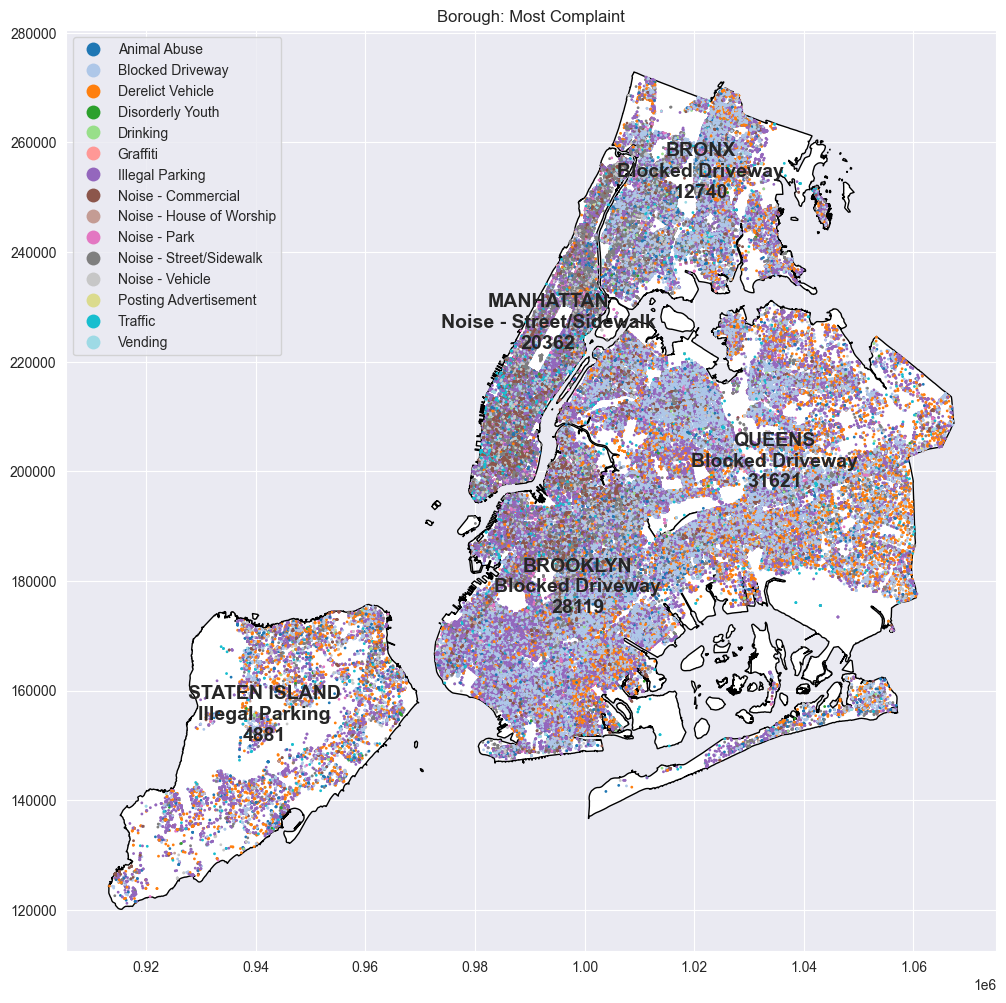

In [152]:
#to plot the borough_data information above map 
borough_merged = borough_data.merge(top_comp_per_borough, left_on='BoroName', right_on='Borough')
#to draw map outlier 
axis= borough_data.plot(color='white', edgecolor='black', figsize=(12, 12))
#using tab20 colors i.e. 10 colors shade for each complaint type
nyc_311_geog.plot(ax=axis, column='Complaint Type',cmap='tab20', markersize=1, legend=True)
#using inrange function to print the borough data details above the map 
for i in range(len(borough_merged)):
    row = borough_merged.iloc[i]
    centroid = row['geometry'].centroid
    label = f"{row['Borough']}\n{row['complaint_type']}\n{row['complaint_count']}"
    axis.text(centroid.x, centroid.y, label, fontsize=14, fontweight='bold', ha='center')
plt.title('Borough: Most Complaint');

<div style="background-color: none"></div>

<div style="background-color: #d4edda; font-size: 13px">Each borough have different major complaints occruing except for <b>blocked driveway</b> which is frequently seen and increasing in other aspect as well. The <b>illegal parking</b> in staten island is seen to be lowest compared to other major complaints in other borough which is for now considered less priority. The most occuring complaint is <b>blocked driveway</b> in 3 different borough and total is <b>80,102</b> which is a serious concern and the NYC priority should be these complaint.</div>

## Insight 4: 

-   <div style="font-size : 20px"><p><b>Time-Series Decomposition</b></p></div>

In [15]:
#creating new column called date to store the creared 
nyc_311_trend['Date'] = nyc_311_trend['Created Date']

In [71]:
nyc_311_trend

Complaint Type        Borough  Resolution_Hours  \
0    Noise - Street/Sidewalk      MANHATTAN          7.336244   
1           Blocked Driveway         QUEENS          4.834937   
2           Blocked Driveway          BRONX          3.692147   
3            Illegal Parking          BRONX          5.416872   
4            Illegal Parking         QUEENS          4.969506   
5            Illegal Parking       BROOKLYN          6.262117   
6            Illegal Parking      MANHATTAN          4.410120   
7           Blocked Driveway          BRONX          3.557508   
8            Illegal Parking         QUEENS          4.537234   
9           Blocked Driveway       BROOKLYN          4.070366   
10          Blocked Driveway         QUEENS          9.211905   
11          Blocked Driveway          BRONX          5.951302   
12   Noise - Street/Sidewalk          BRONX          4.272054   
13           Illegal Parking       BROOKLYN          8.491719   
14          Derelict Vehicle         QUEENS          5.040597   
15          Blocked Driveway         QUEENS          4.238408   
16          Blocked Driveway         QUEENS          4.150517   
17        Noise - Commercial       BROOKLYN          2.433807   
18        Noise - Commercial       BROOKLYN          3.325518   
19   Noise - Street/Sidewalk      MANHATTAN          3.893514   
20           Illegal Parking          BRONX          5.808054   
21           Illegal Parking         QUEENS          3.540561   
22        Noise - Commercial       BROOKLYN          3.060385   
23           Illegal Parking      MANHATTAN          3.897937   
24          Blocked Driveway          BRONX          3.493165   
25          Blocked Driveway         QUEENS          8.899043   
26  Noise - House of Worship      MANHATTAN          8.243204   
27          Blocked Driveway         QUEENS          5.063965   
28           Illegal Parking      MANHATTAN          6.567845   
29        Noise - Commercial       BROOKLYN          9.562361   
30        Noise - Commercial       BROOKLYN          6.567714   
31        Noise - Commercial       BROOKLYN          4.268110   
32          Blocked Driveway          BRONX          3.382474   
33                       NaN            NaN          4.751650   
34          Blocked Driveway         QUEENS          3.845295   
35           Illegal Parking         QUEENS          4.699985   
36          Blocked Driveway       BROOKLYN          2.984935   
37           Illegal Parking         QUEENS          2.736461   
38   Noise - Street/Sidewalk       BROOKLYN          3.774555   
39     Posting Advertisement  STATEN ISLAND          3.000536   
40        Noise - Commercial      MANHATTAN          4.559546   
41        Noise - Commercial       BROOKLYN          3.061349   
42     Posting Advertisement  STATEN ISLAND          2.307741   
43        Noise - Commercial       BROOKLYN          3.603076   
44          Blocked Driveway         QUEENS          2.503382   
45        Noise - Commercial      MANHATTAN          4.749613   
46     Posting Advertisement  STATEN ISLAND          3.133673   
47           Illegal Parking      MANHATTAN          2.955970   
48        Noise - Commercial      MANHATTAN          3.817607   
49     Posting Advertisement  STATEN ISLAND          2.933586   
50        Noise - Commercial      MANHATTAN          5.227227   
51     Posting Advertisement  STATEN ISLAND          3.297649   
52        Noise - Commercial      MANHATTAN          2.738465   
53           Illegal Parking      MANHATTAN          3.630128   
54   Noise - Street/Sidewalk      MANHATTAN          2.964068   
55           Illegal Parking       BROOKLYN          5.563352   
56        Noise - Commercial       BROOKLYN          3.287232   
57          Blocked Driveway         QUEENS          2.631220   
58           Illegal Parking          BRONX          3.702957   
59        Noise - Commercial         QUEENS          3.237646   
60           Illegal Parking          BRONX      

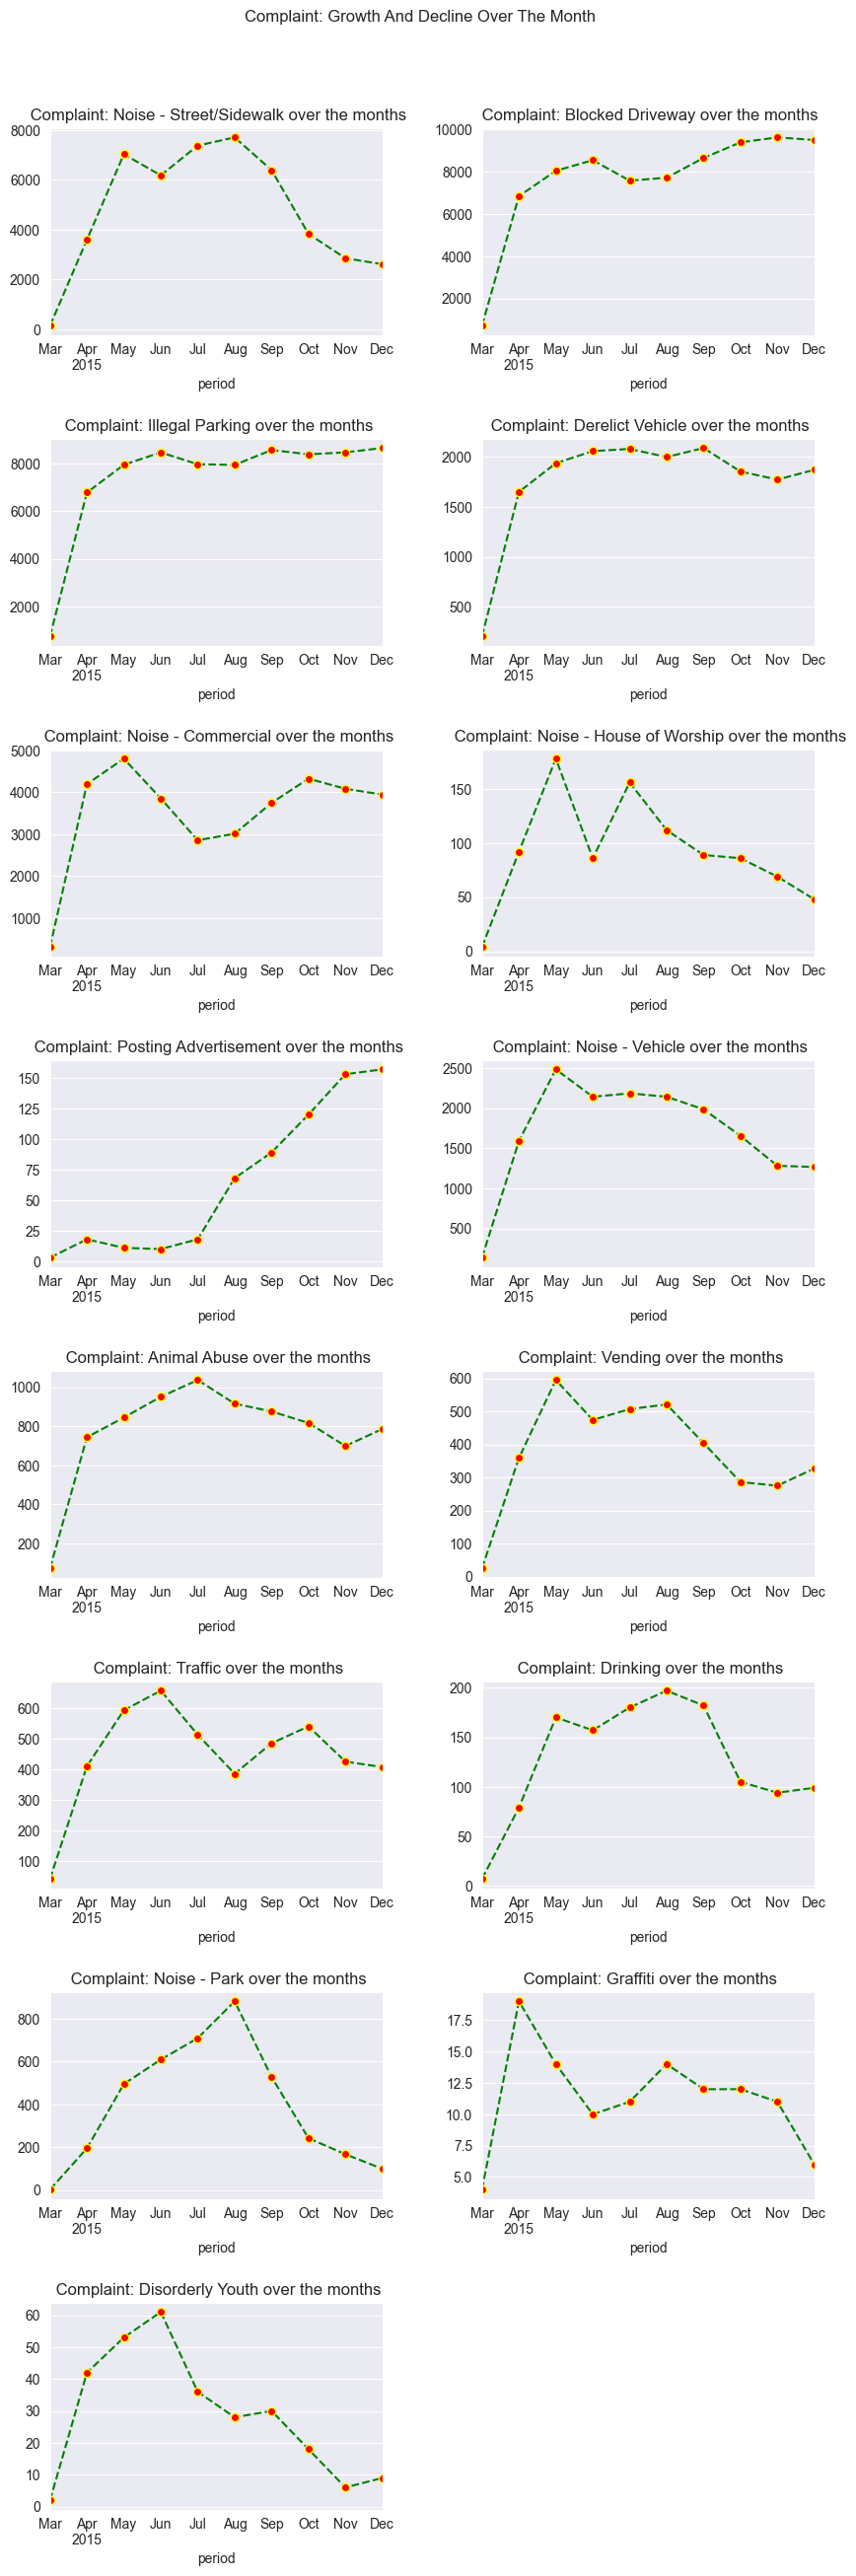

In [155]:
#enumerating over the complaint types to check the trends for time series decomposition
complaint_types = nyc_311_trend['Complaint Type'].unique()
plt.figure(figsize=(10, 60))
# a dictionaries to store decomposition of multiplicative and then plot it in another function as a helper
m_decompositions = {}
# a dictionaries to store decomposition of additive and then plot it in another function as a helper
a_decompositions = {}

#each subplot stored plotted graphs with labels of specific complaint type
for i, complaint_type in  enumerate(complaint_types):
    plt.subplot(15, 2, i + 1)
    df_complaint = nyc_311_trend[nyc_311_trend['Complaint Type'] == complaint_type].set_index('Date')
    df_complaint['period'] = df_complaint['Created Date'].dt.to_period('M')
    ts = df_complaint.groupby('period').size()
    ts.index = ts.index.to_timestamp()

    #to store complaint type as key and multiplicative decomposition as value in dict
    multiplicative_decomposition = seasonal_decompose(ts, model='multiplicative', period=5)
    m_decompositions[complaint_type]=multiplicative_decomposition

    additive_decomposition = seasonal_decompose(ts, model='additive', period=5)
    a_decompositions[complaint_type]=additive_decomposition
    
    ts.plot(title=f" Complaint: {complaint_type} over the months", marker = "o", ls="--", mfc="red", color="green", mec="yellow")
    plt.subplots_adjust( wspace=0.3, hspace=0.5)
    
plt.suptitle("Complaint: Growth And Decline Over The Month", y=0.9)
plt.show()

<div style="background-color: #d4edda; font-size: 13px">High-volume complaints like <b>Blocked Driveway</b> and <b>Illegal Parking</b> show stable trends, while noise-related complaints may exhibit short-term increases in December.</div>

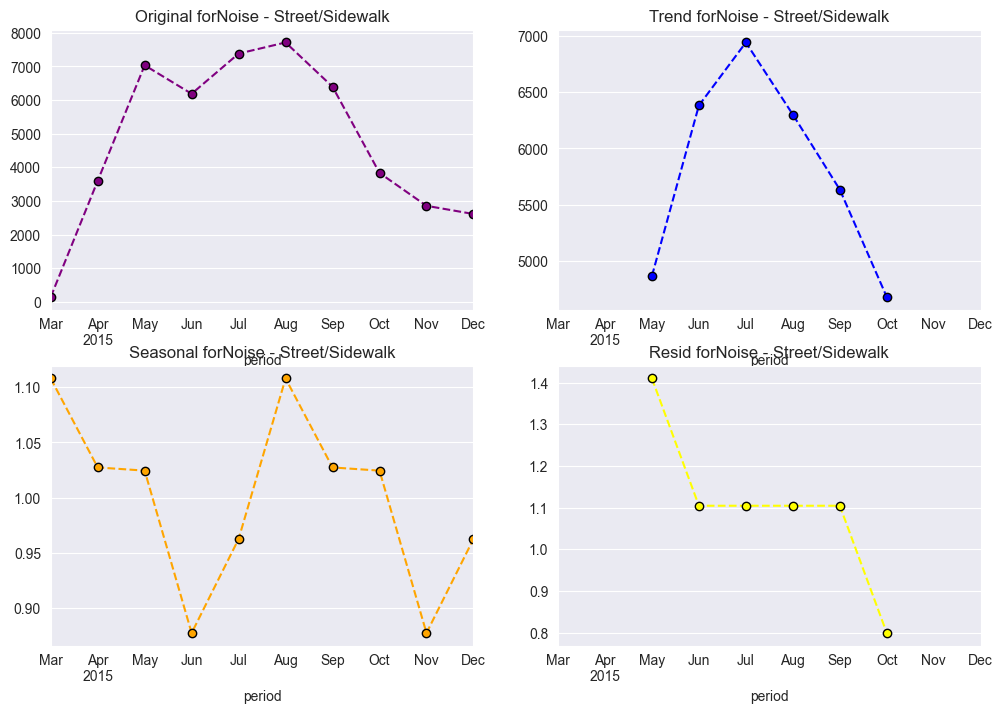

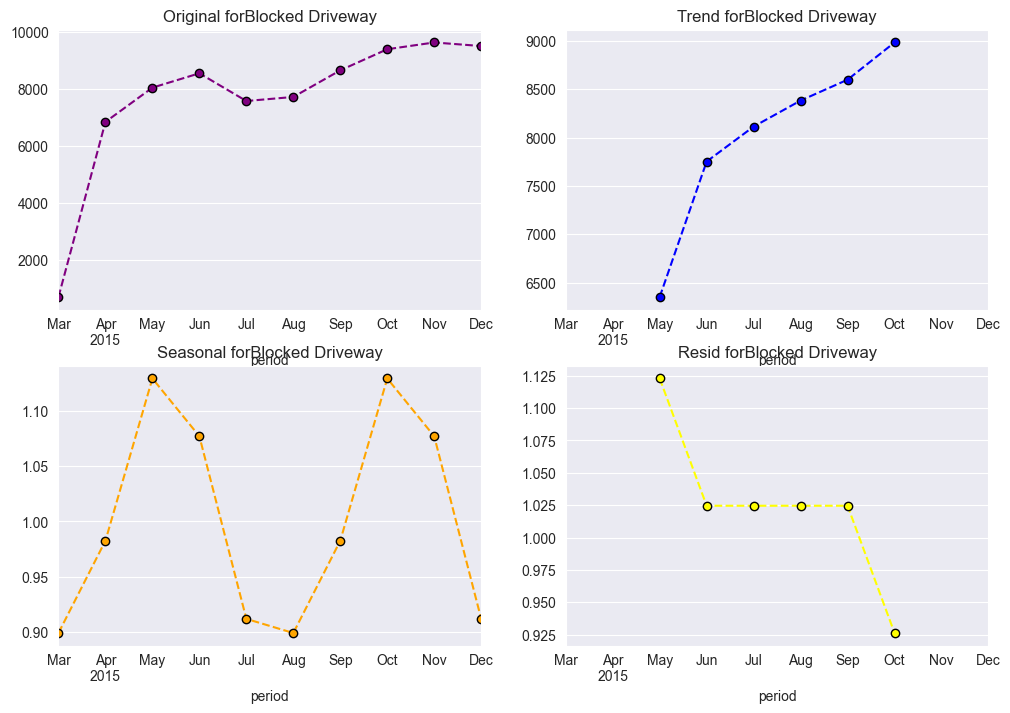

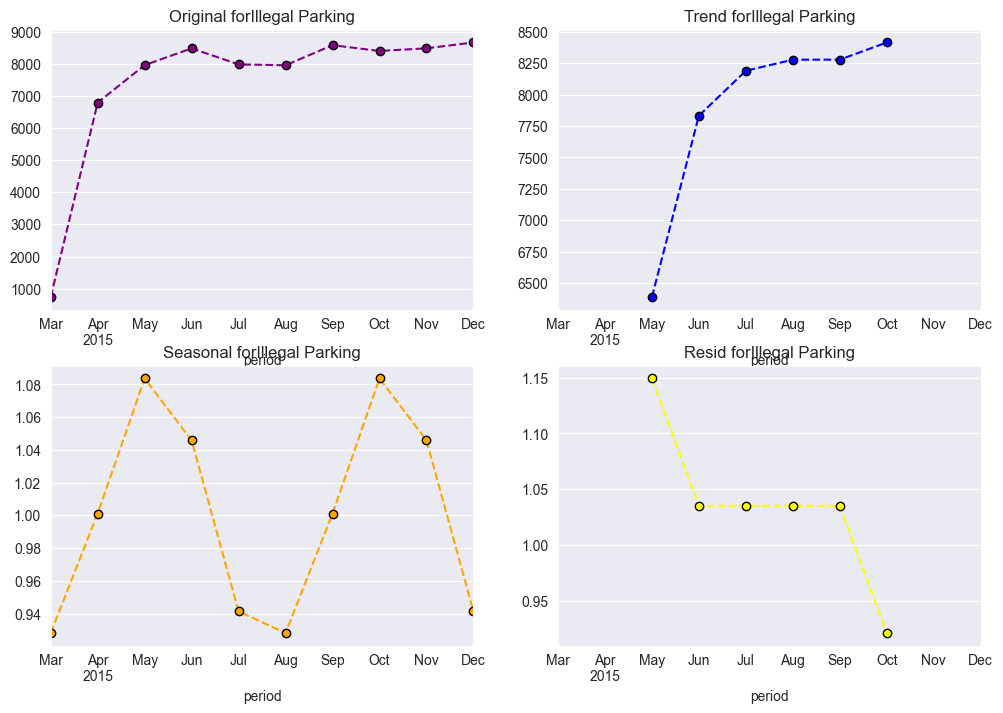

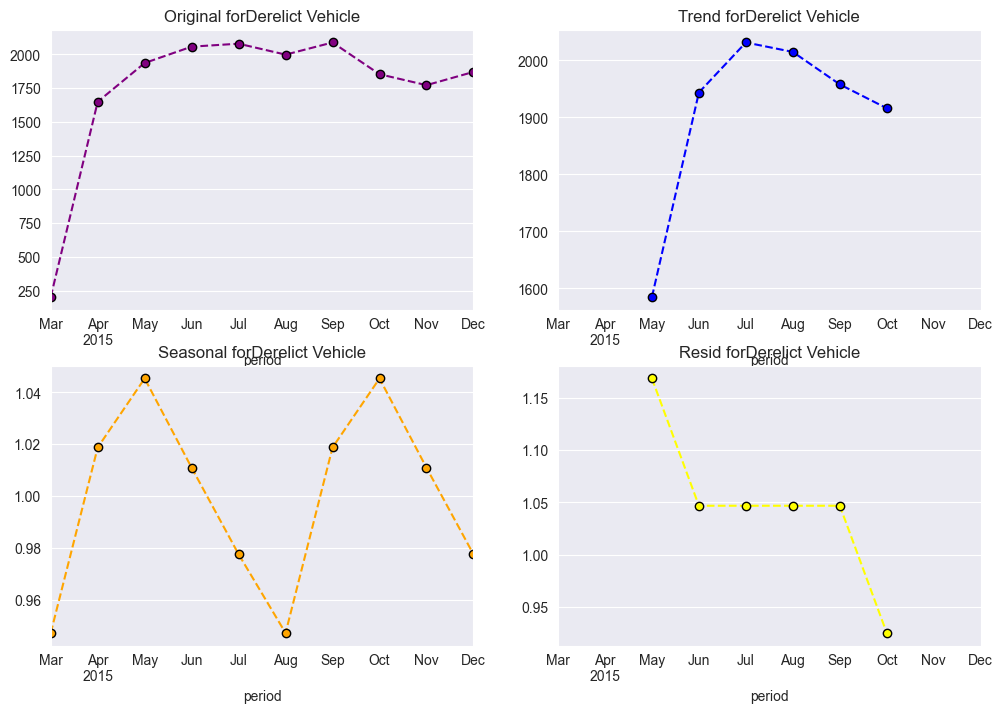

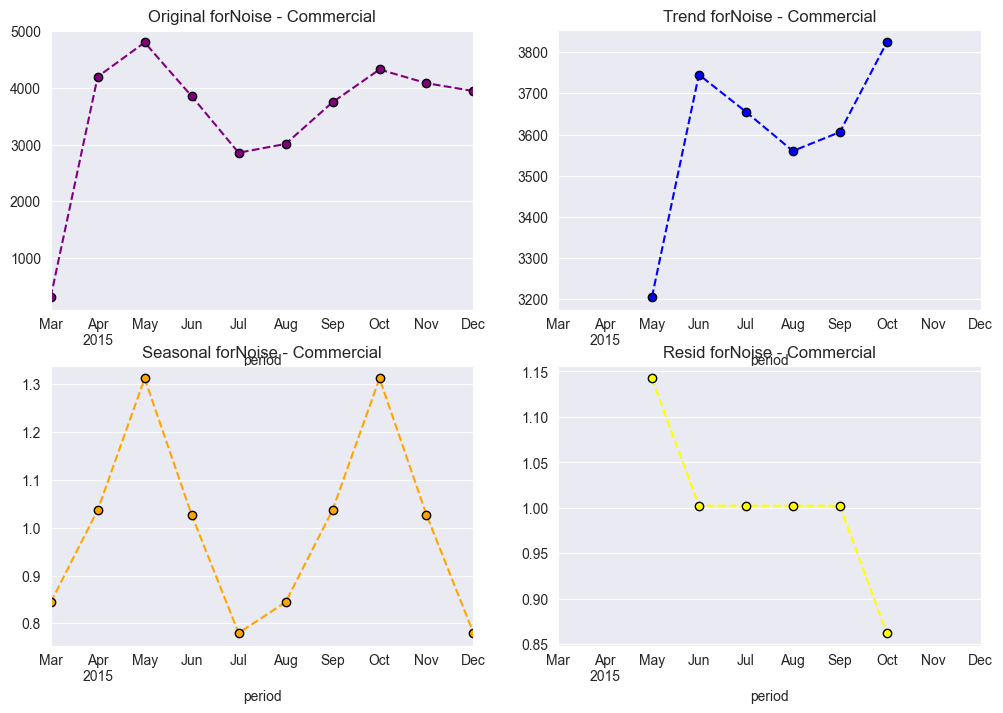

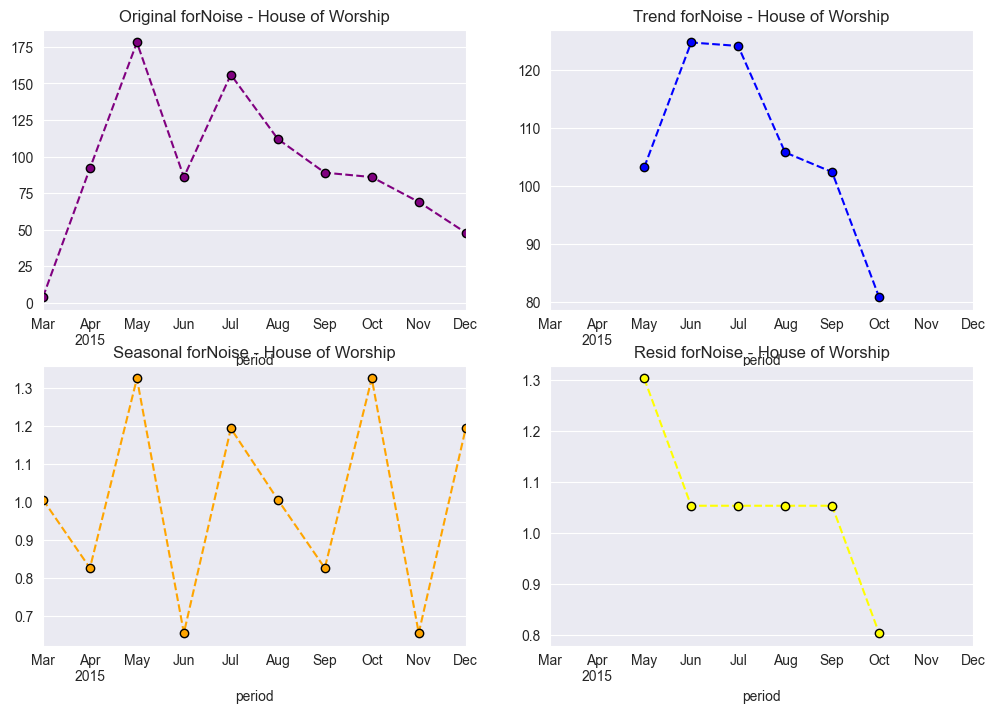

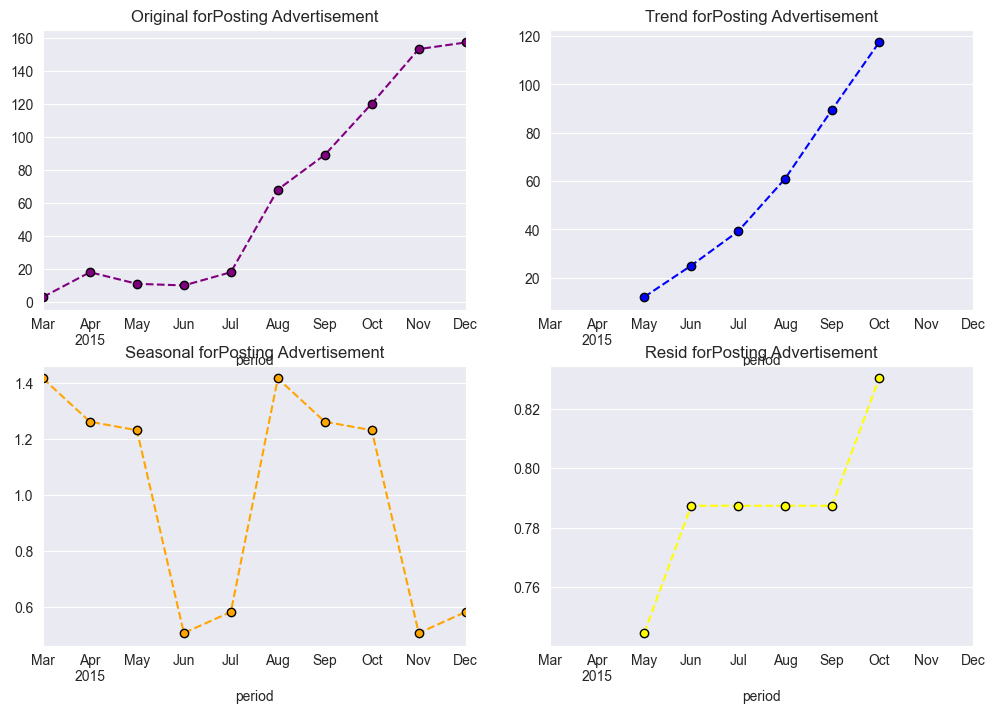

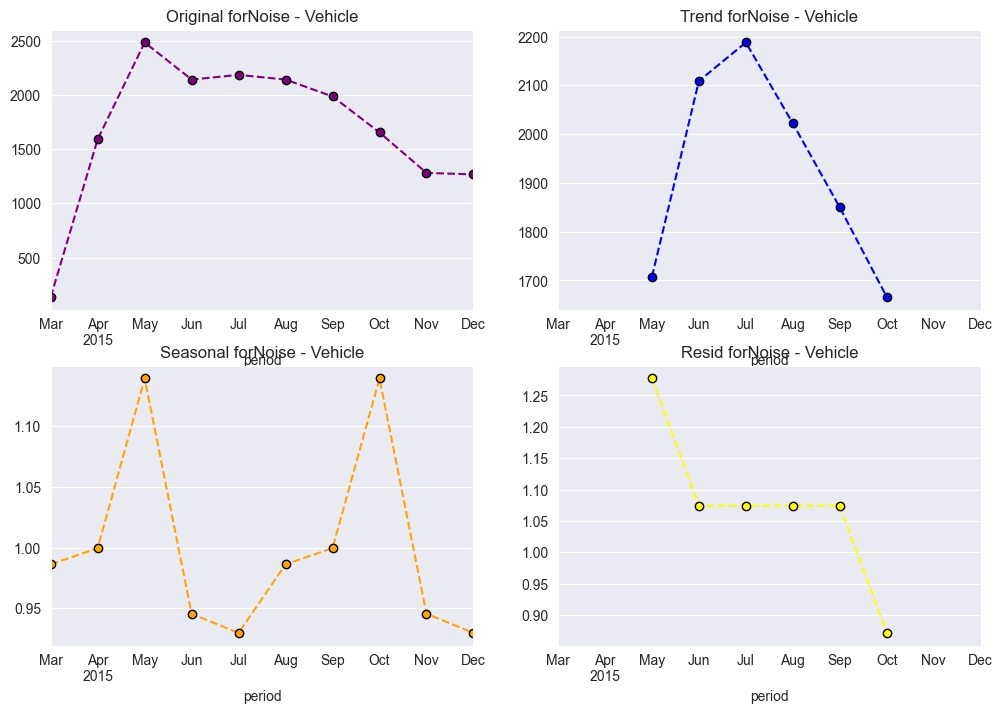

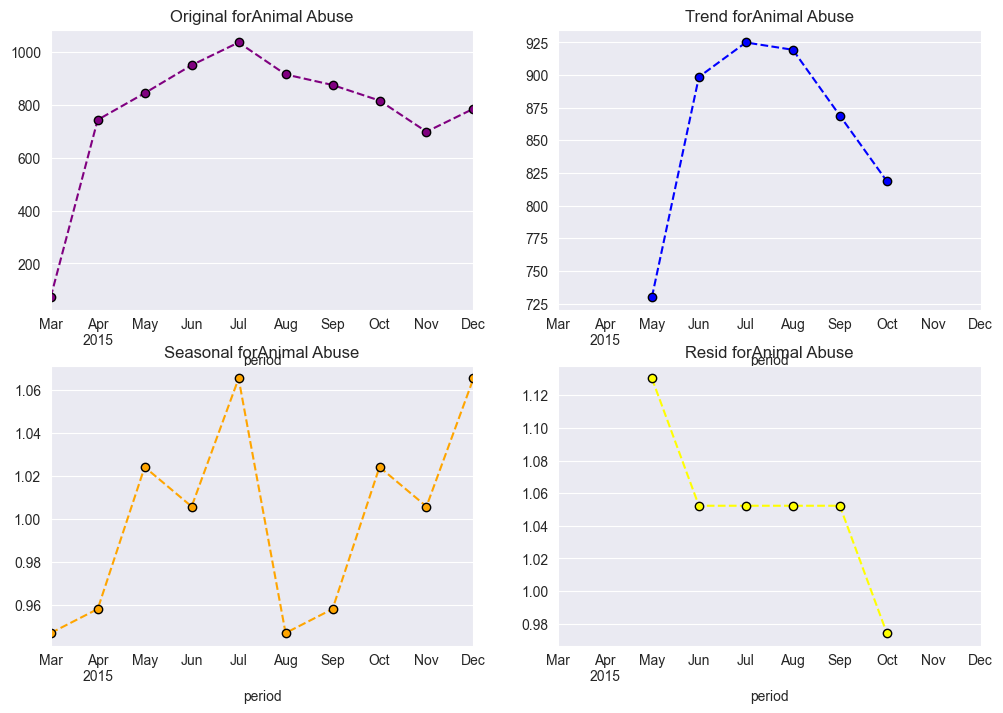

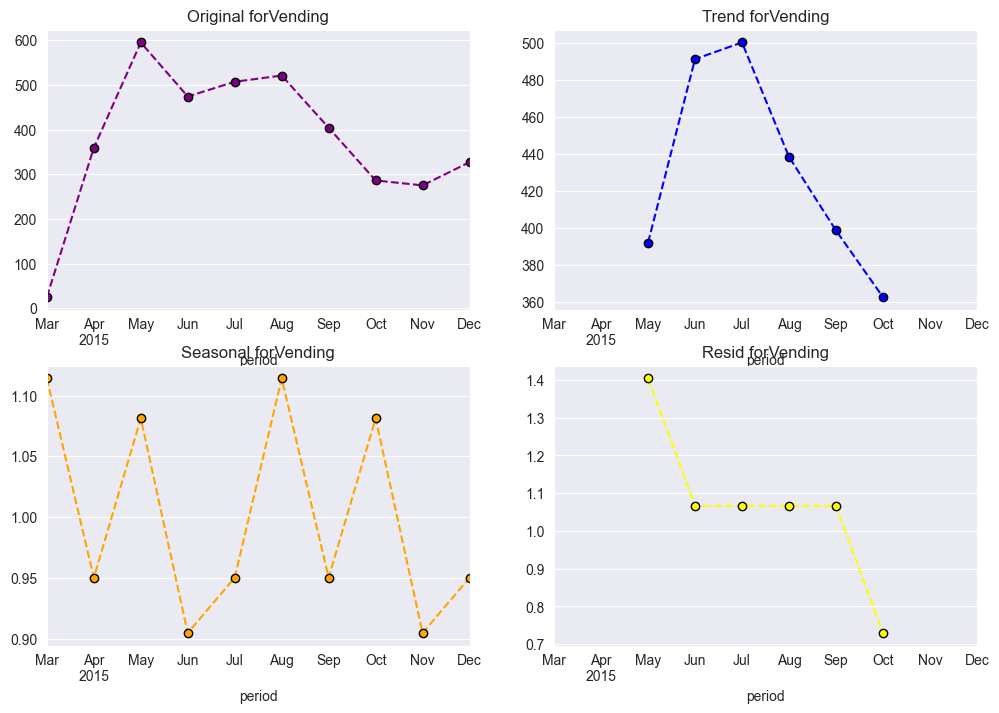

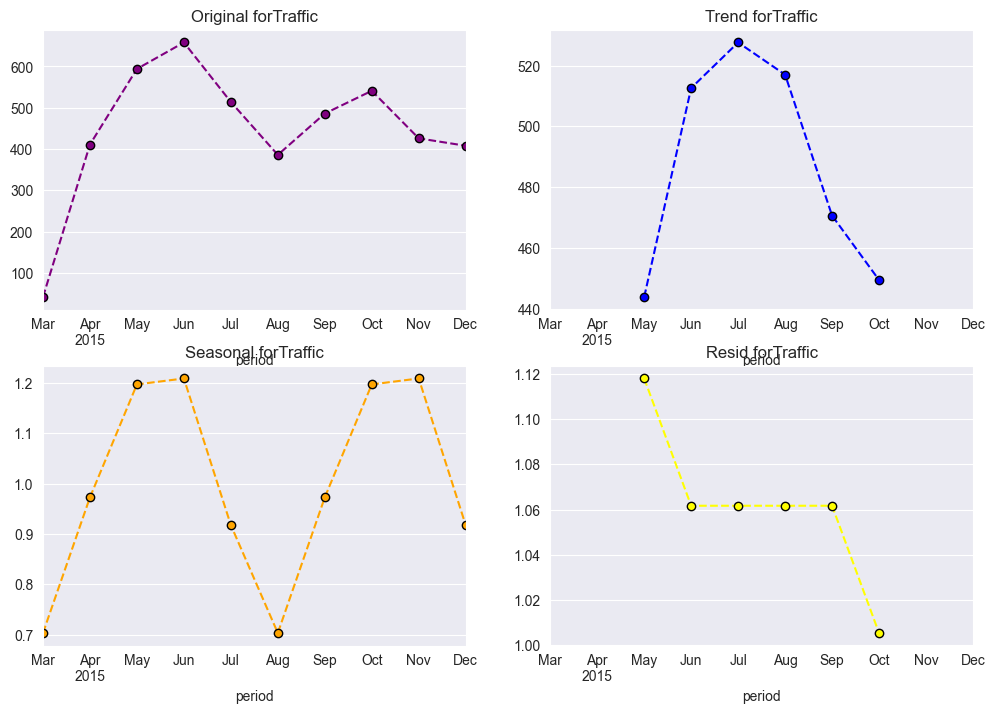

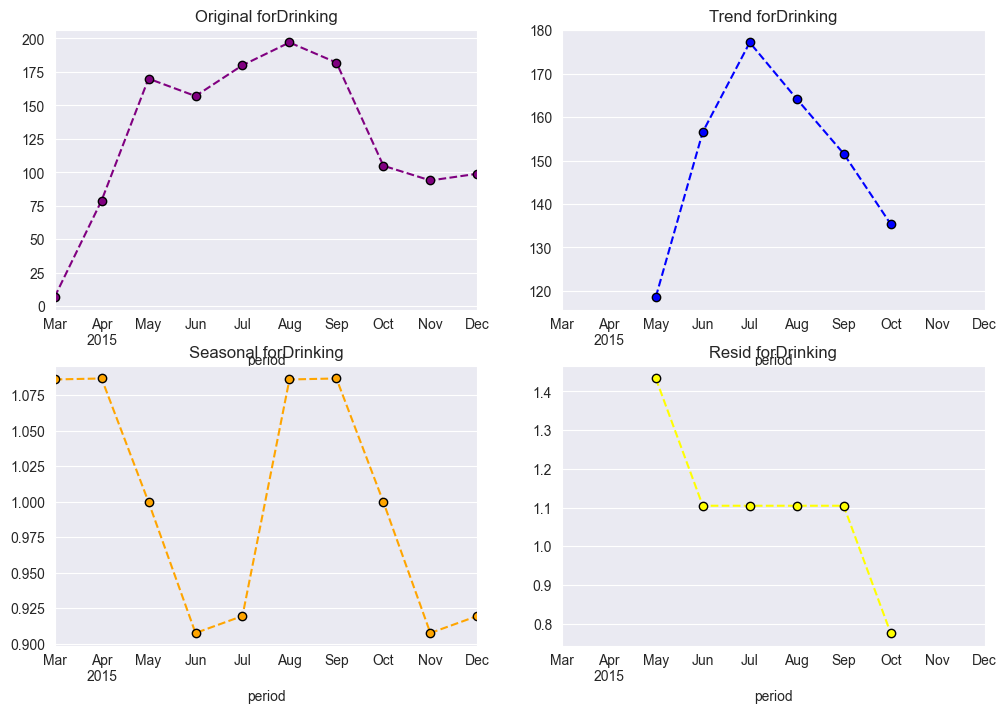

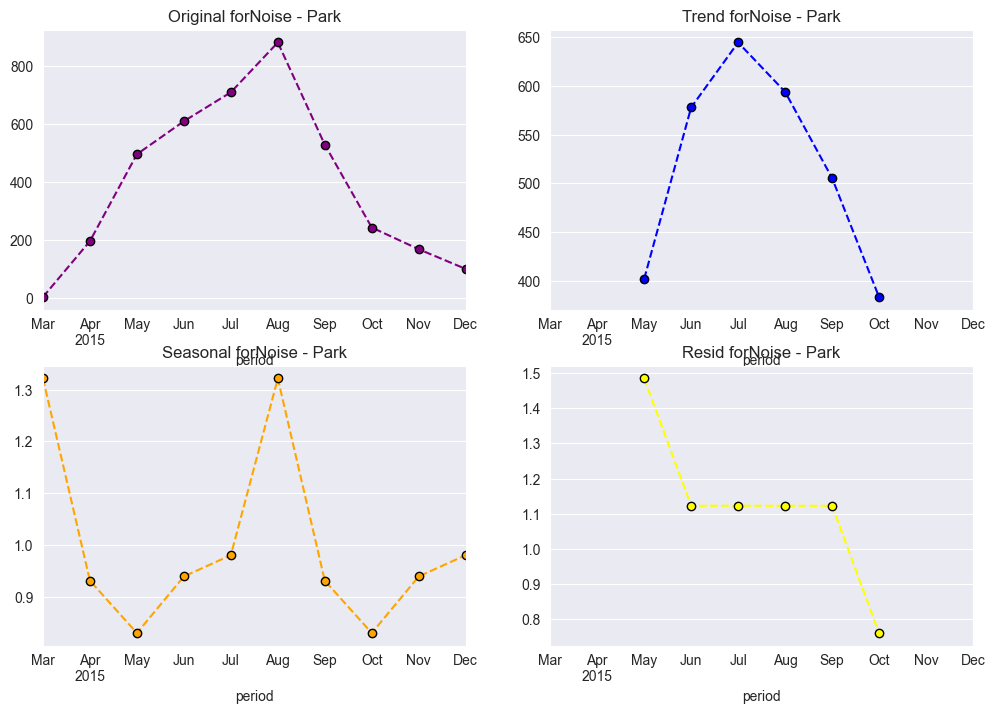

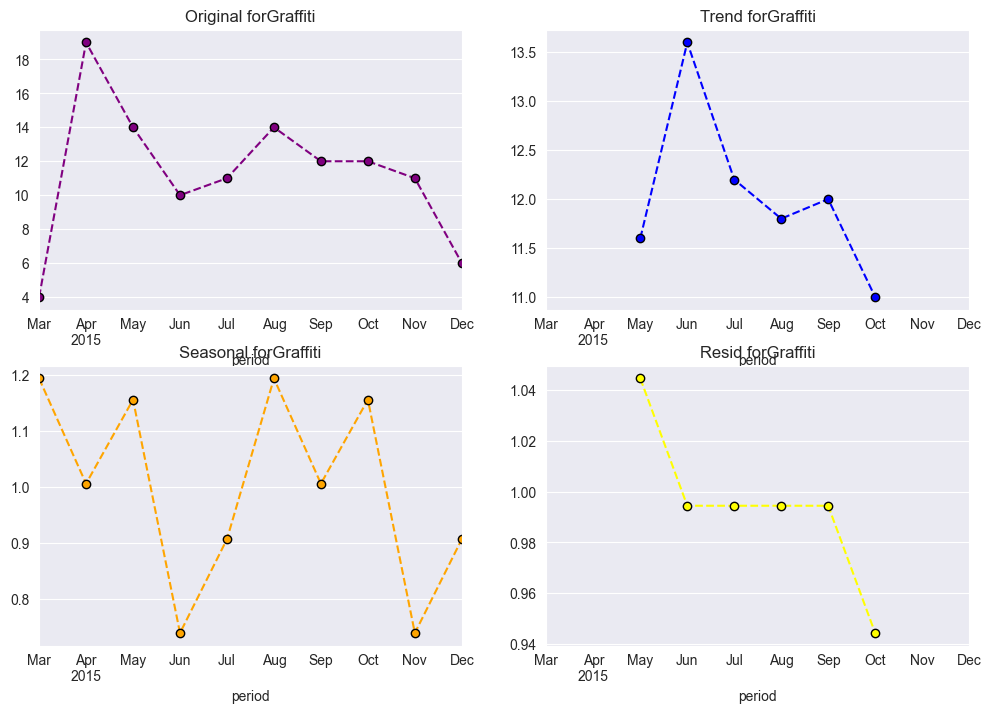

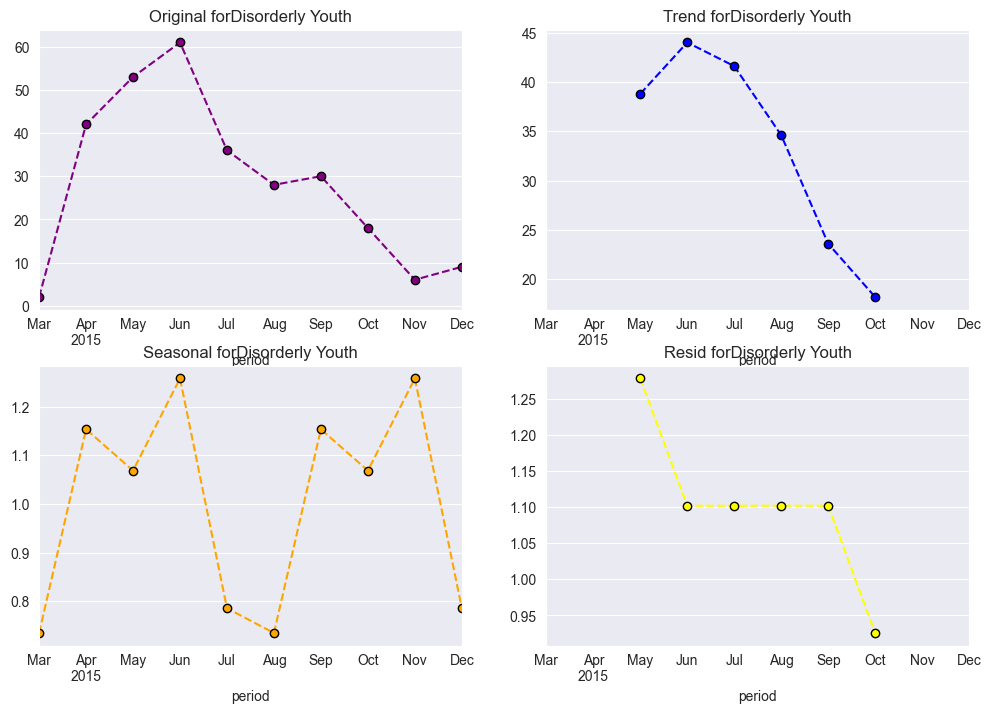

In [156]:
#to perform multiplicative decompose Y = T * S * R
for complaint_type, multiplicative_decomposition in m_decompositions.items():
    plt.figure(figsize=(12, 8))

    plt.subplot(2,2,1)
    multiplicative_decomposition.observed.plot(title=f"Original for{complaint_type}",color="purple", marker="o", ls="--", mec="black")
    
    plt.subplot(2,2,2)
    multiplicative_decomposition.trend.plot(title=f"Trend for{complaint_type}", color="blue", marker="o", ls="--" ,mec="black")

    plt.subplot(2,2,3)
    multiplicative_decomposition.seasonal.plot(title=f"Seasonal for{complaint_type}", color="orange", marker="o", ls="--", mec="black")

    plt.subplot(2,2,4)
    multiplicative_decomposition.resid.plot(title=f"Resid for{complaint_type}", color="yellow", marker="o", ls="--", mec="black")

    plt.xticks(rotation=45, fontsize=10)

<div style="background-color: #d4edda; font-size: 13px">High-volume complaints like <b>Blocked Driveway</b> and <b>Illegal Parking</b> remain stable over the  months with a slight increase in noise complaints by December 2015, reflecting a  chance of holiday activity.</div>

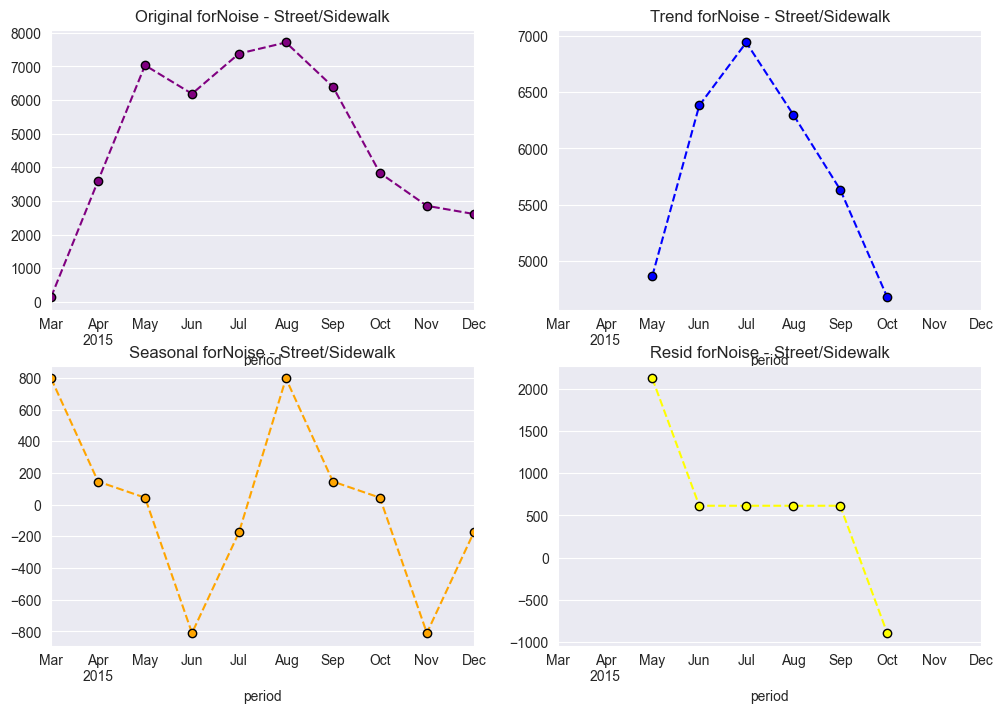

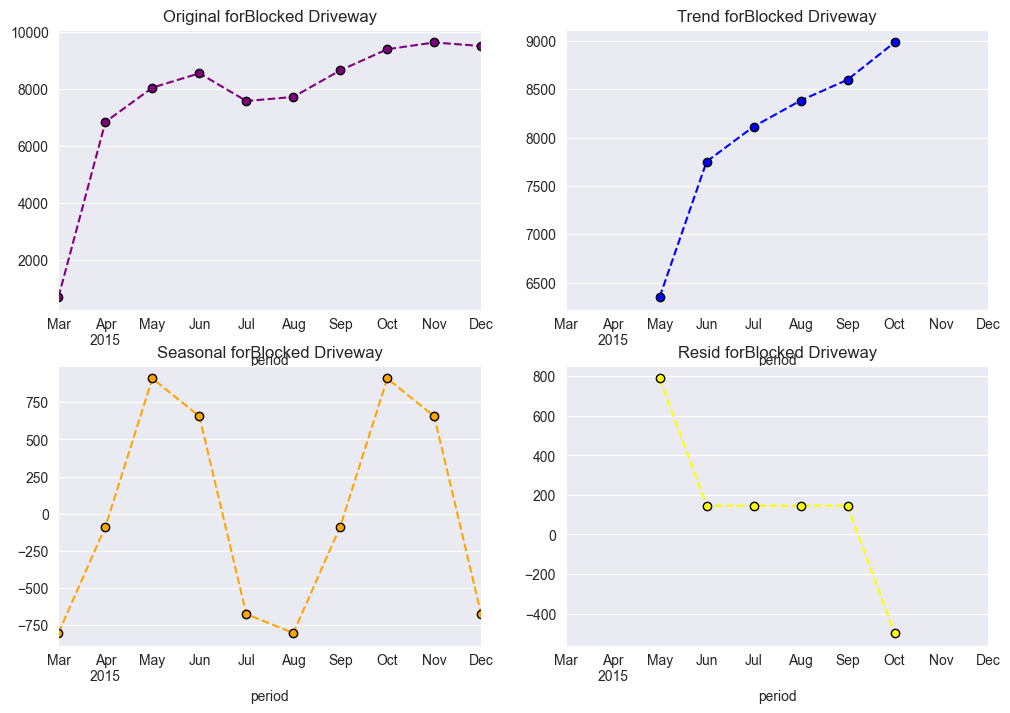

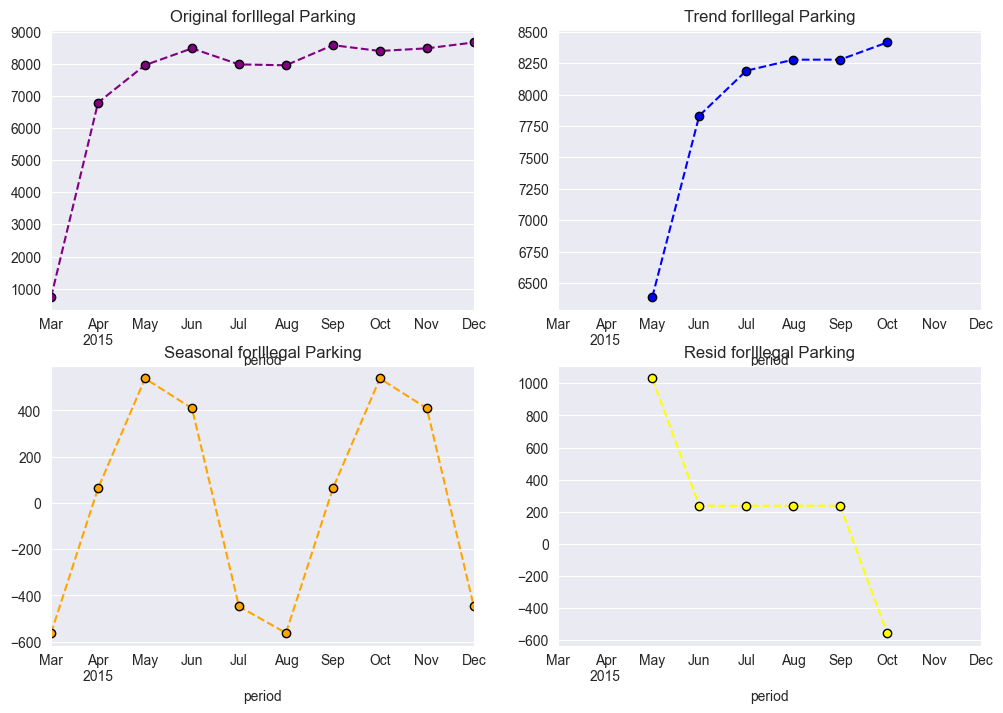

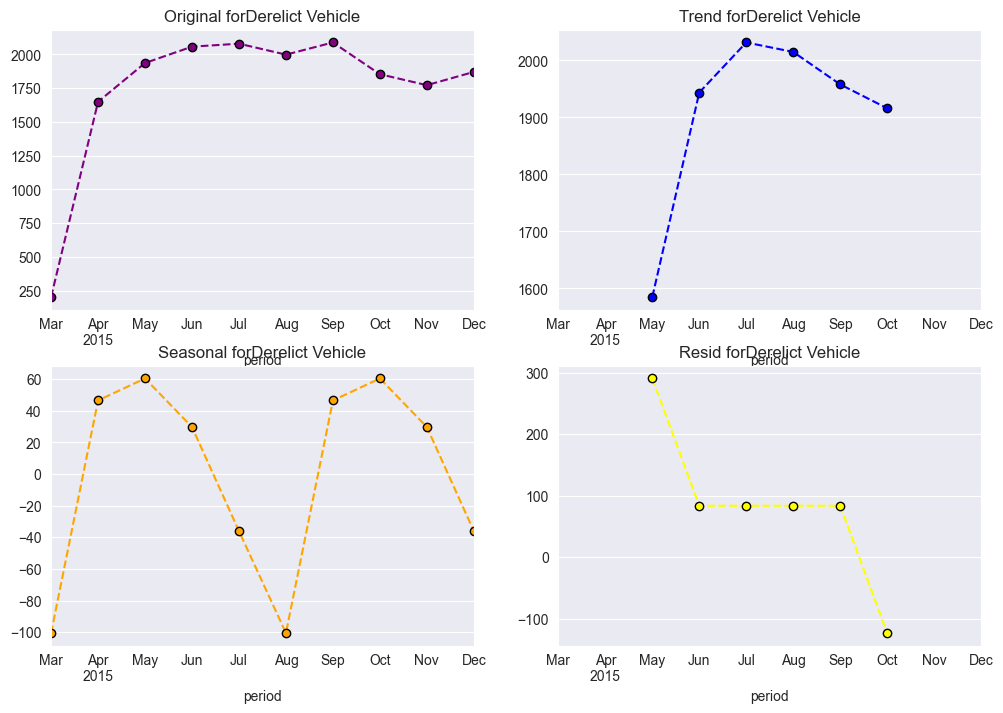

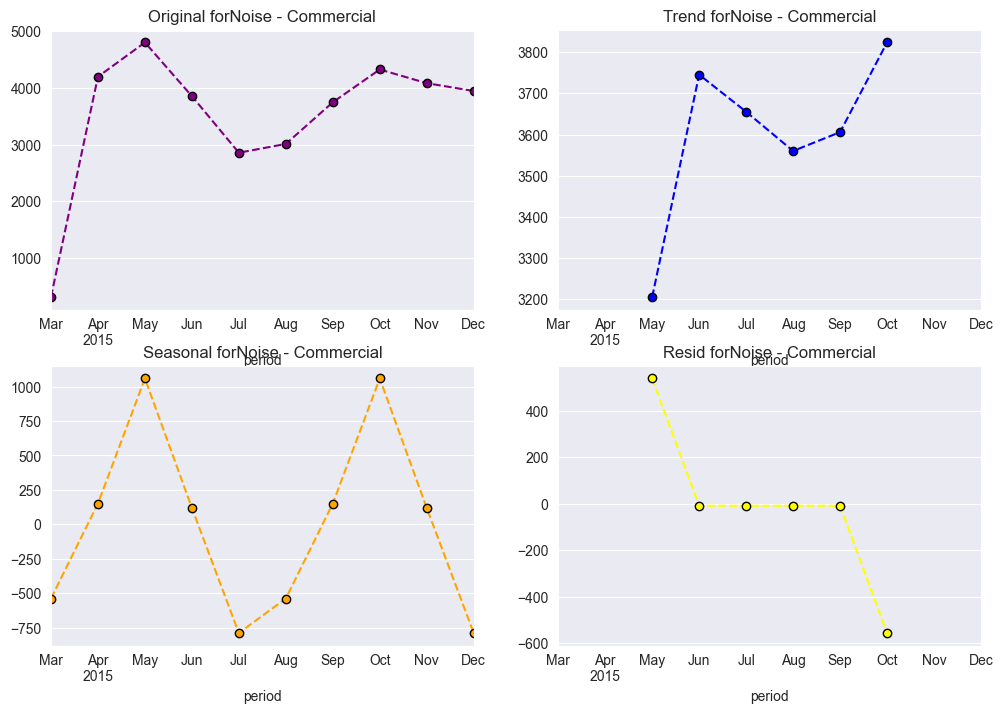

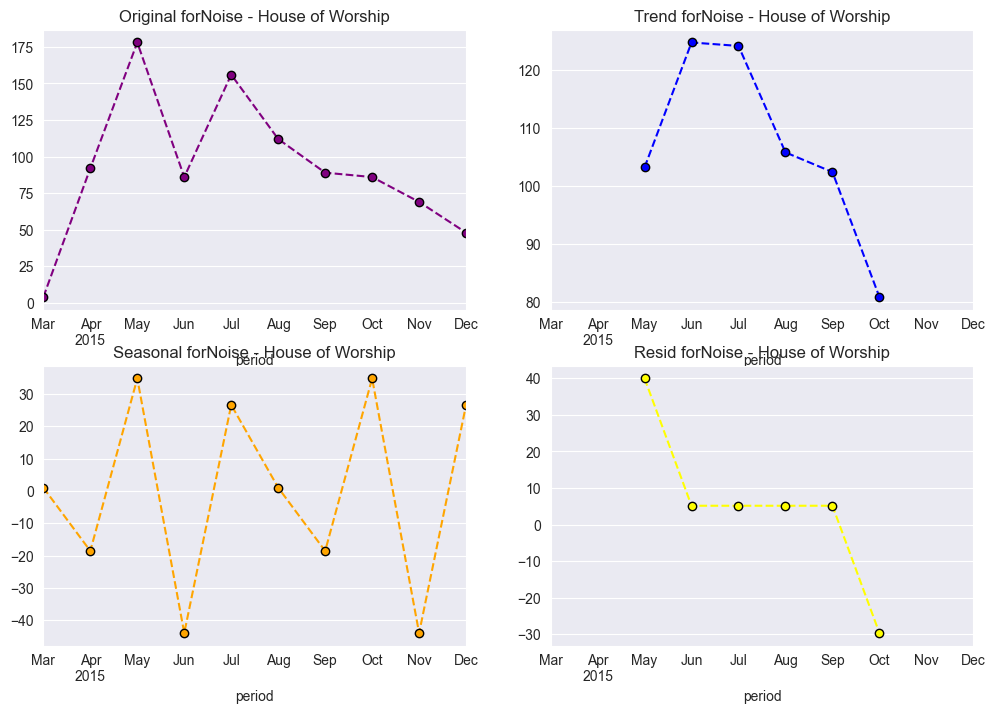

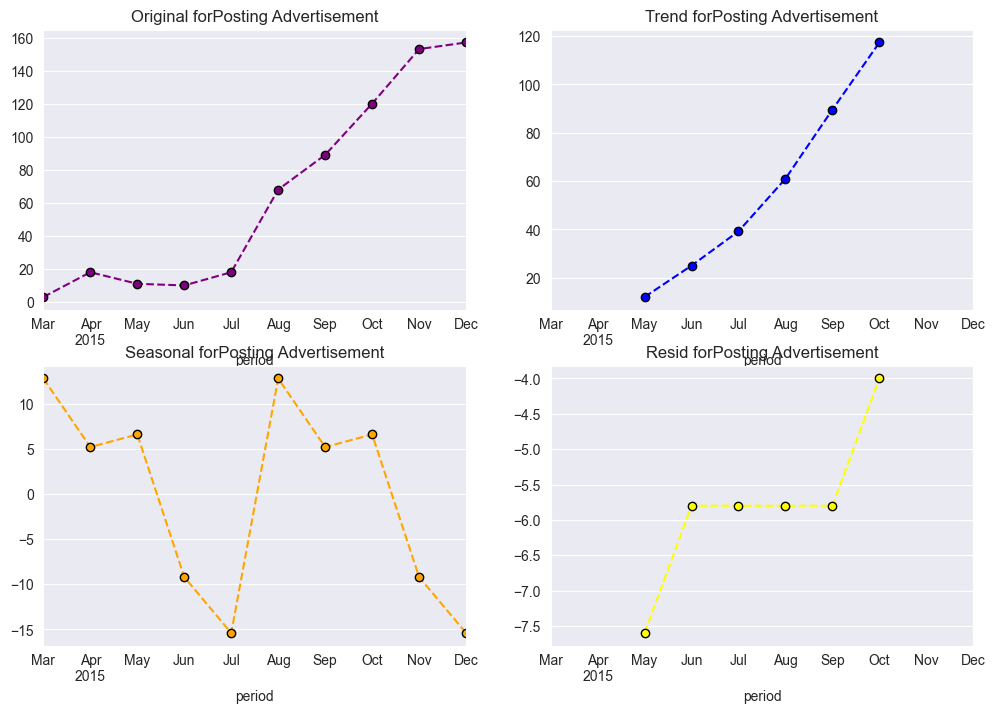

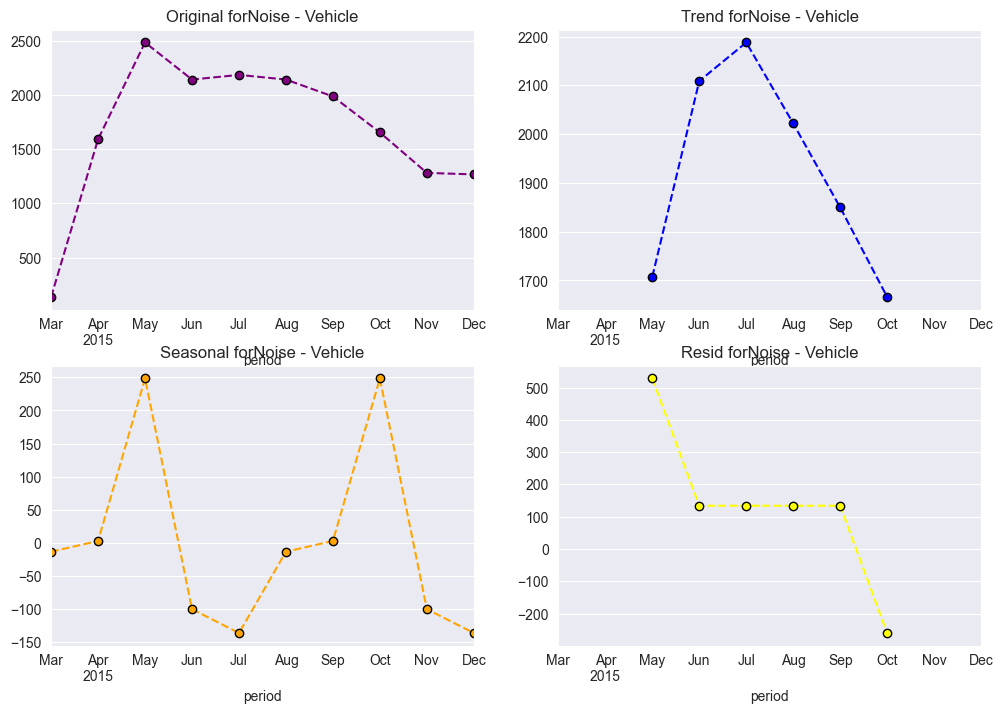

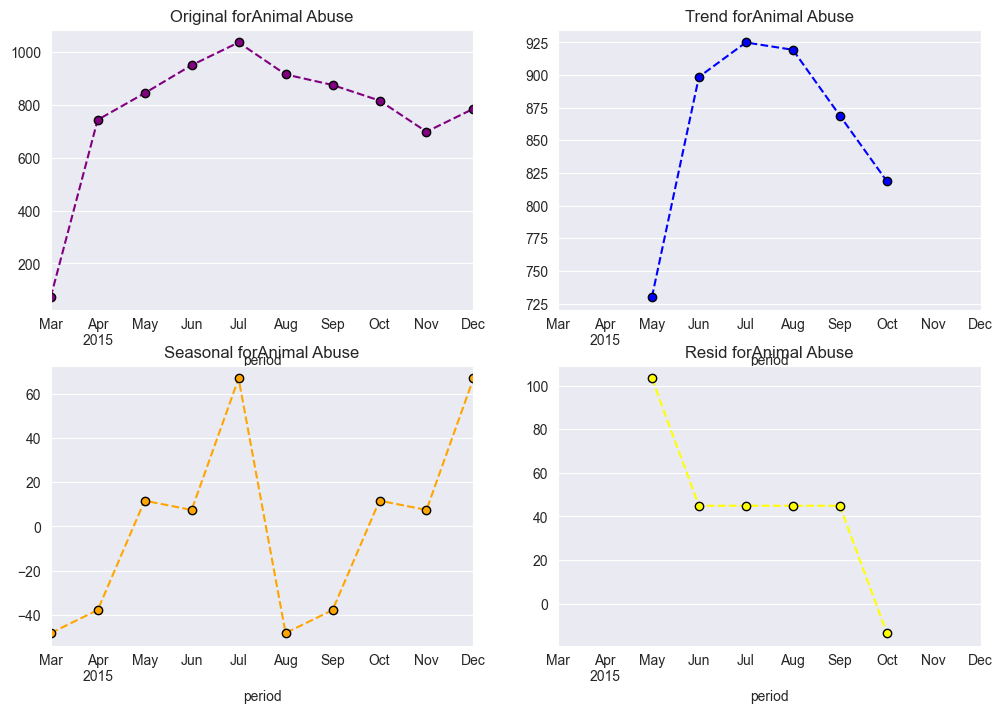

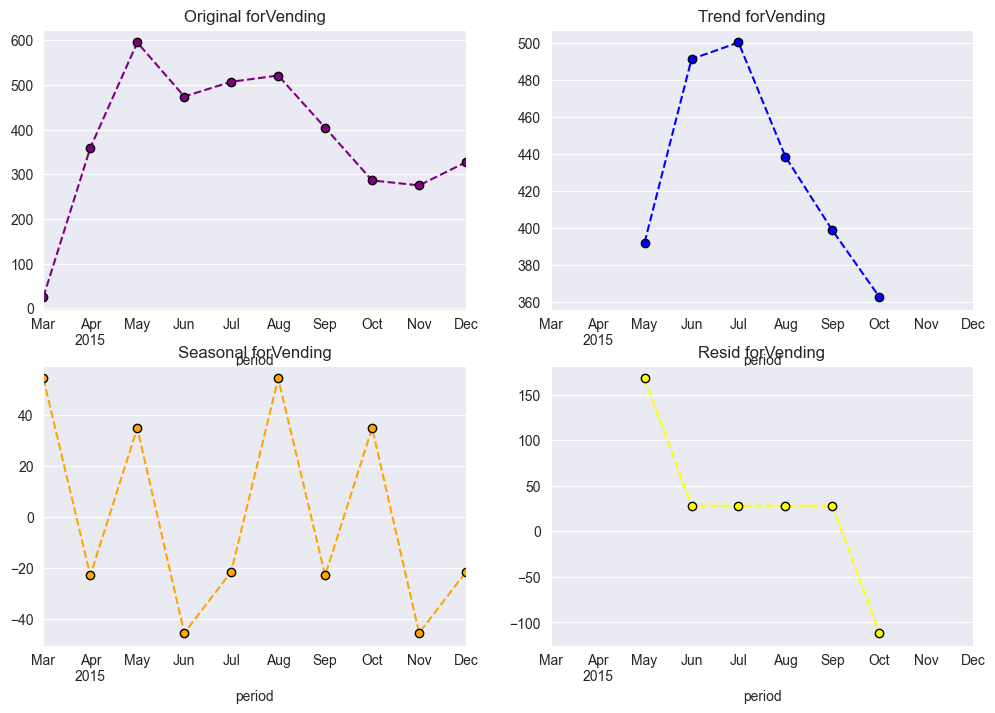

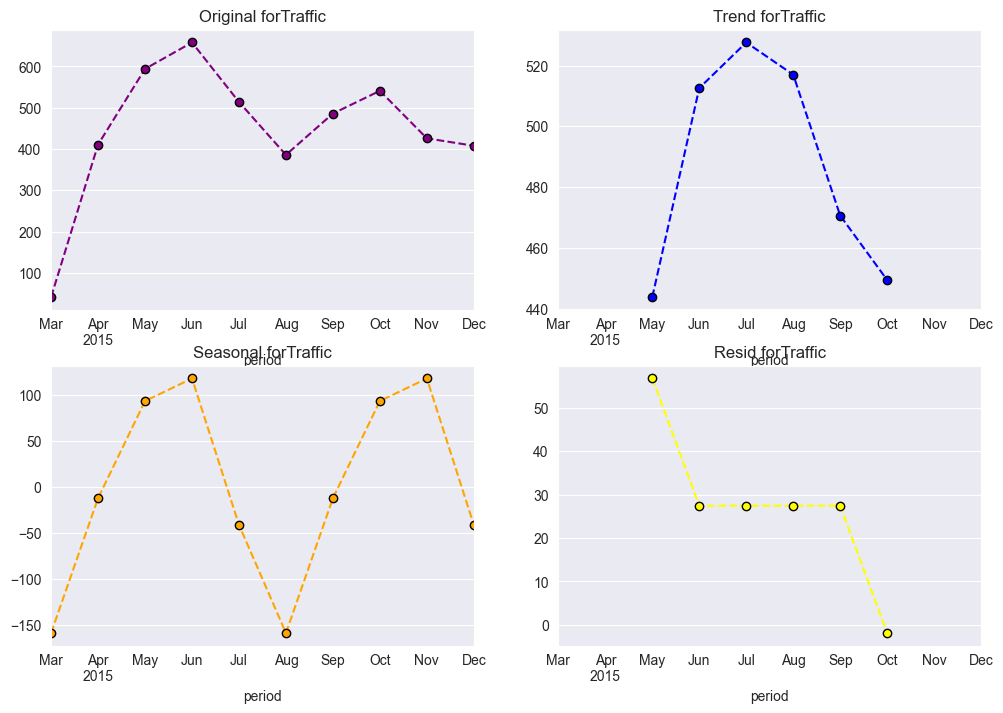

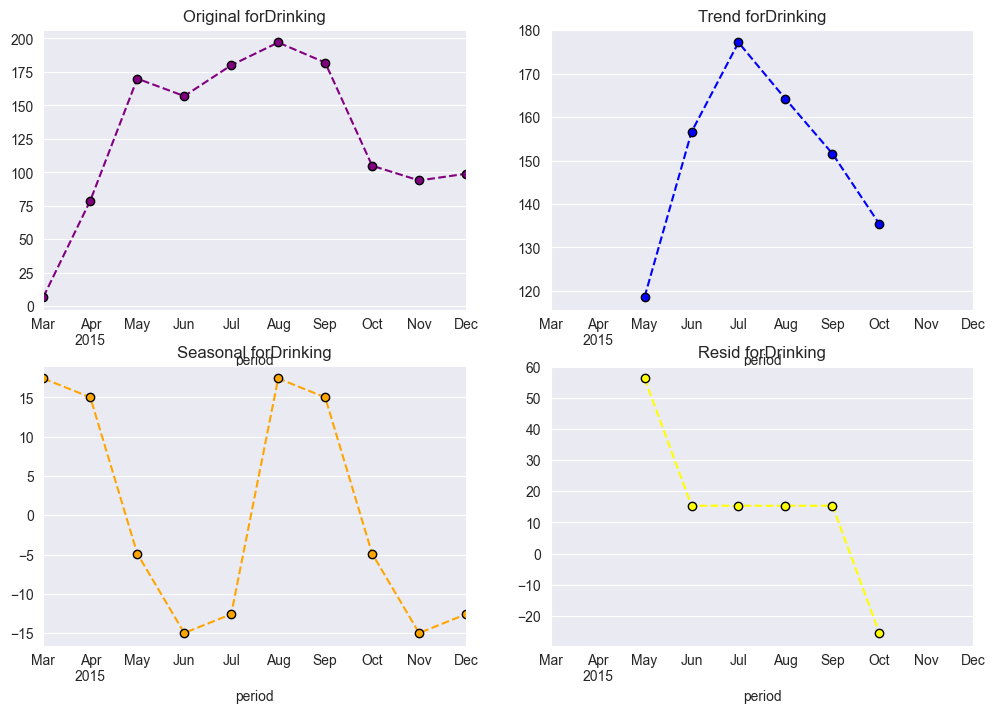

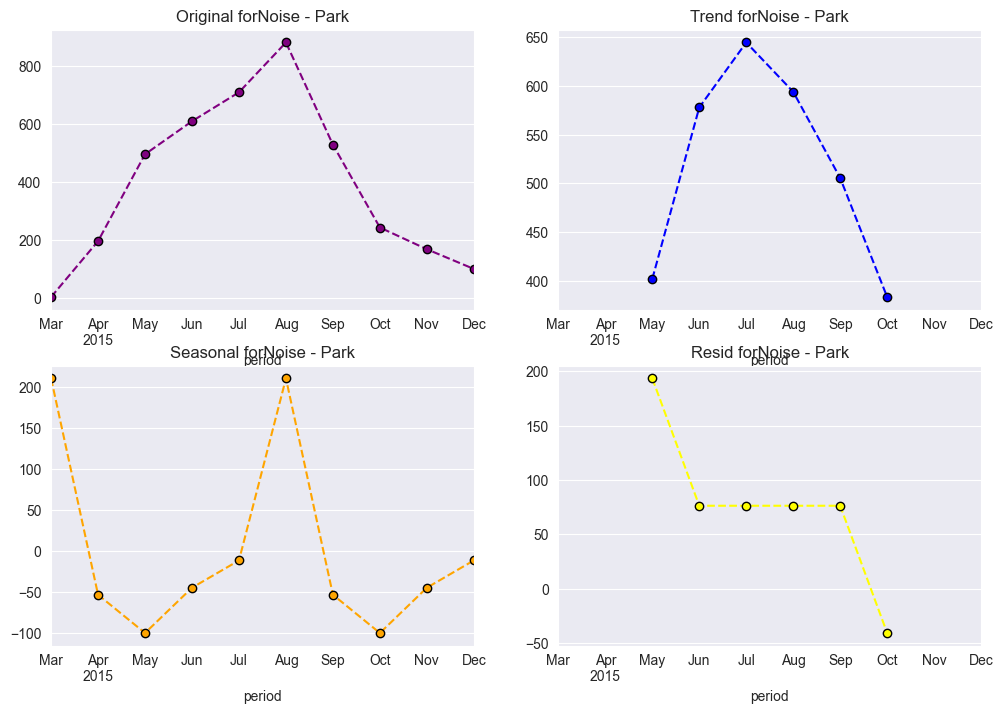

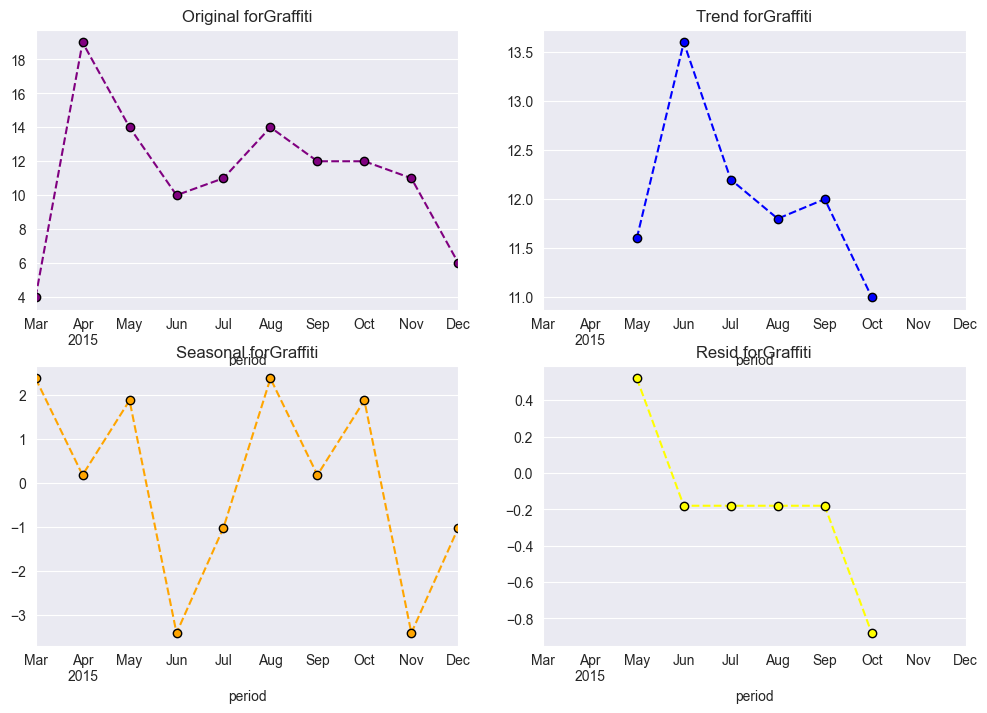

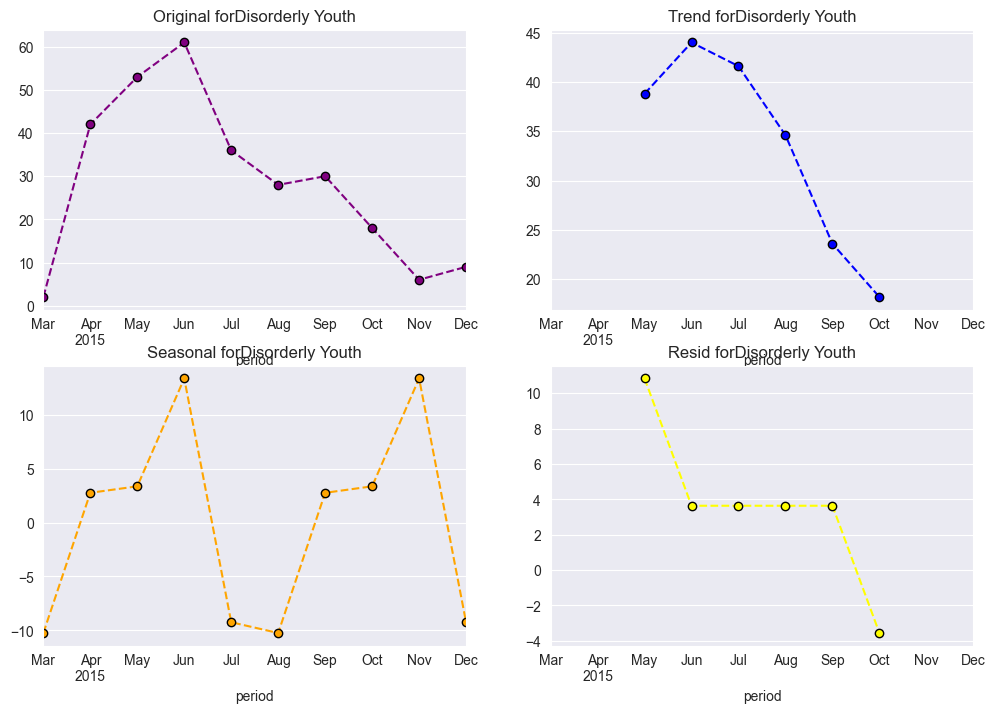

In [157]:
#to perform additive decompose Y = T + S + R
for complaint_type, additive_decomposition in a_decompositions.items():
    plt.figure(figsize=(12, 8))

    plt.subplot(2,2,1)
    additive_decomposition.observed.plot(title=f"Original for{complaint_type}",color="purple", marker="o", ls="--", mec="black")
    
    plt.subplot(2,2,2)
    additive_decomposition.trend.plot(title=f"Trend for{complaint_type}", color="blue", marker="o", ls="--" ,mec="black")

    plt.subplot(2,2,3)
    additive_decomposition.seasonal.plot(title=f"Seasonal for{complaint_type}", color="orange", marker="o", ls="--", mec="black")

    plt.subplot(2,2,4)
    additive_decomposition.resid.plot(title=f"Resid for{complaint_type}", color="yellow", marker="o", ls="--", mec="black")

    plt.xticks(rotation=45, fontsize=10)

<div style="background-color: #d4edda; font-size: 13px">Similar to multiplicative, showing stability in <b>Blocked Driveway</b> and <b>Illegal Parking</b> with noise complaints slightly rising toward December 2015.</div>

<div style="background-color: none"></div>

<div style="background-color: none"></div>

## Arranging complaint types according to their average 'Requested Closing Time' categorized by Borough: 

In [16]:
#group by the complaint type and borough to show the resolution time
nyc_311_trend['Resolution_Hours'] = nyc_311_trend['Requested_Closing_Time'].dt.total_seconds() / 3600
nyc_311_trend = nyc_311_trend.groupby(['Complaint Type', 'Borough'])['Resolution_Hours'].mean().reset_index()
# Sort the data by 'Resolution_Hours' in ascending order 
average_resolution_time = nyc_311_trend.sort_values('Resolution_Hours', ascending=False)

In [17]:
#check the average resolution time complaints
average_resolution_time

Complaint Type        Borough  Resolution_Hours
29                  Graffiti  STATEN ISLAND          9.562361
10          Derelict Vehicle          BRONX          9.211905
25                  Graffiti          BRONX          8.899043
13          Derelict Vehicle         QUEENS          8.491719
26                  Graffiti       BROOKLYN          8.243204
0               Animal Abuse          BRONX          7.336244
70                   Vending          BRONX          6.827107
28                  Graffiti         QUEENS          6.567845
30           Illegal Parking          BRONX          6.567714
5           Blocked Driveway          BRONX          6.262117
11          Derelict Vehicle       BROOKLYN          5.951302
20                  Drinking          BRONX          5.808054
55           Noise - Vehicle          BRONX          5.563352
3               Animal Abuse         QUEENS          5.416872
50   Noise - Street/Sidewalk          BRONX          5.227227
63     Posting Advertisement         QUEENS          5.163444
27                  Graffiti      MANHATTAN          5.063965
14          Derelict Vehicle  STATEN ISLAND          5.040597
4               Animal Abuse  STATEN ISLAND          4.969506
65                   Traffic          BRONX          4.937278
1               Animal Abuse       BROOKLYN          4.834937
73                   Vending         QUEENS          4.767227
33           Illegal Parking         QUEENS          4.751650
45              Noise - Park          BRONX          4.749613
35        Noise - Commercial          BRONX          4.699985
40  Noise - House of Worship          BRONX          4.559546
8           Blocked Driveway         QUEENS          4.537234
71                   Vending       BROOKLYN          4.525270
6           Blocked Driveway       BROOKLYN          4.410120
12          Derelict Vehicle      MANHATTAN          4.272054
74                   Vending  STATEN ISLAND          4.271489
31           Illegal Parking       BROOKLYN          4.268110
68                   Traffic         QUEENS          4.265157
15          Disorderly Youth          BRONX          4.238408
16          Disorderly Youth       BROOKLYN          4.150517
9           Blocked Driveway  STATEN ISLAND          4.070366
23                  Drinking         QUEENS          3.897937
19          Disorderly Youth  STATEN ISLAND          3.893514
34           Illegal Parking  STATEN ISLAND          3.845295
48              Noise - Park         QUEENS          3.817607
38        Noise - Commercial         QUEENS          3.774555
58           Noise - Vehicle         QUEENS          3.702957
2               Animal Abuse      MANHATTAN          3.692147
53   Noise - Street/Sidewalk         QUEENS          3.630128
43  Noise - House of Worship         QUEENS          3.603076
60     Posting Advertisement          BRONX          3.562639
7           Blocked Driveway      MANHATTAN          3.557508
21                  Drinking       BROOKLYN          3.540561
69                   Traffic  STATEN ISLAND          3.509092
24                  Drinking  STATEN ISLAND          3.493165
32           Illegal Parking      MANHATTAN          3.382474
61     Posting Advertisement       BROOKLYN          3.360951
18          Disorderly Youth         QUEENS          3.325518
72                   Vending      MANHATTAN          3.300744
51   Noise - Street/Sidewalk       BROOKLYN          3.297649
56           Noise - Vehicle       BROOKLYN          3.287232
59           Noise - Vehicle  STATEN ISLAND          3.237646
46              Noise - Park       BROOKLYN          3.133673
66                   Traffic       BROOKLYN          3.103074
41  Noise - House of Worship       BROOKLYN          3.061349
22                  Drinking      MANHATTAN          3.060385
39        Noise - Commercial  STATEN ISLAND          3.000536
36        Noise - Commercial       BROOKLYN          2.984935
54   Noise - Street/Sidewalk  STATEN ISLAND   

In [25]:
#arrange data into index, columns and values
average_resolution_time.pivot(index='Complaint Type', columns='Borough', values='Resolution_Hours')

Borough                      BRONX  BROOKLYN  MANHATTAN    QUEENS  \
Complaint Type                                                      
Animal Abuse              7.336244  4.834937   3.692147  5.416872   
Blocked Driveway          6.262117  4.410120   3.557508  4.537234   
Derelict Vehicle          9.211905  5.951302   4.272054  8.491719   
Disorderly Youth          4.238408  4.150517   2.433807  3.325518   
Drinking                  5.808054  3.540561   3.060385  3.897937   
Graffiti                  8.899043  8.243204   5.063965  6.567845   
Illegal Parking           6.567714  4.268110   3.382474  4.751650   
Noise - Commercial        4.699985  2.984935   2.736461  3.774555   
Noise - House of Worship  4.559546  3.061349   2.307741  3.603076   
Noise - Park              4.749613  3.133673   2.955970  3.817607   
Noise - Street/Sidewalk   5.227227  3.297649   2.738465  3.630128   
Noise - Vehicle           5.563352  3.287232   2.631220  3.702957   
Posting Advertisement     3.562639  3.360951   2.955373  5.163444   
Traffic                   4.937278  3.103074   2.654539  4.265157   
Vending                   6.827107  4.525270   3.300744  4.767227   

Borough                   STATEN ISLAND  
Complaint Type                           
Animal Abuse                   4.969506  
Blocked Driveway               4.070366  
Derelict Vehicle               5.040597  
Disorderly Youth               3.893514  
Drinking                       3.493165  
Graffiti                       9.562361  
Illegal Parking                3.845295  
Noise - Commercial             3.000536  
Noise - House of Worship       2.503382  
Noise - Park                   2.933586  
Noise - Street/Sidewalk        2.964068  
Noise - Vehicle                3.237646  
Posting Advertisement          1.542039  
Traffic                        3.509092  
Vending                        4.271489

<Figure size 3000x1000 with 0 Axes>

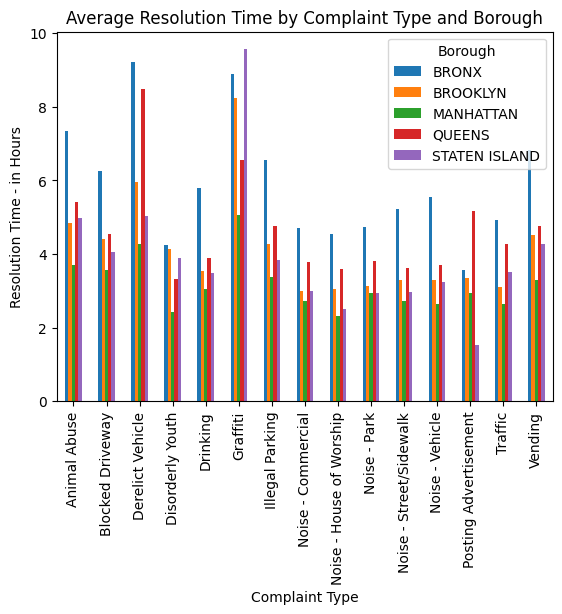

In [26]:
#plot a multibar (subbar) for the average resolution time based on complaint type and borough
plt.figure(figsize=(30, 10))
average_resolution_time.pivot(index='Complaint Type', columns='Borough', values='Resolution_Hours').plot(kind='bar');

plt.title('Average Resolution Time by Complaint Type and Borough')
plt.xlabel('Complaint Type')
plt.ylabel('Resolution Time - in Hours')
plt.show()


<div style="background-color: #d4edda; font-size: 13px">The longest time taken to resolve the issue is seen in <b>Bronx</b> borough except for the <b>Graffiti</b> complaint. The customer service must inform the agencies to prioritize more on this borough.</div>

<div style="background-color: none"></div>

<div style="background-color: none"></div>

<p><b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></p>

# Statistical Testing

-   <div style="font-size : 20px"><p><b>Test 1:</b> Whether the average response time acress complaint types is similar or not</p></div>

<div style="background-color: white; font-size: 13px">The <b>Anova testing</b> is used in this case as the test 1 requires comparison of mean is done across multiple complaint type categories (more than two groups)</div>
For the testing, since the goal is to compare the average response times across different complaint types, a one-way ANOVA is appropriate. This is because there is only one independent variable, which is the Complaint Type, and the test will compare the means of the dependent variable, which is the resolution time, across the different levels of Complaint Type.

-  <div style="background-color: white; font-size: 13px"><b>Null Hypothesis (H0)</b> : The average response time (resolution time) is the same across all complaint types.</div>
-  <div style="background-color: white; font-size: 13px"><b>Alternative Hypothesis (H1)</b> :  At least one complaint type has a significantly different average response time.</div>

#### Check Assumption

-  <div style="background-color: white; font-size: 13px"><b>Normality</b> : Each group's data should be roughly normally distributed.</div>
-  <div style="background-color: white; font-size: 13px"><b>Homogenity</b> : Variances across groups should be similar.</div>

In [31]:
#as anova assumes the data to be normally distributed we check the distrubution
for complaint in nyc_311_trend['Complaint Type'].unique():
    group = nyc_311_trend[nyc_311_trend['Complaint Type'] == complaint]['Resolution_Hours']
    #if-else condition for sample data size according to their group size
    if(len(group)<=15):
        sample = random.sample(list(group), len(group)) 
    elif(len(group)>15):
        sample = random.sample(list(group), 15) 

    stat, p = shapiro(sample)
    print(f"{complaint}:p-value ={p:.3f}")

Animal Abuse:p-value =0.598
Blocked Driveway:p-value =0.293
Derelict Vehicle:p-value =0.452
Disorderly Youth:p-value =0.293
Drinking:p-value =0.082
Graffiti:p-value =0.666
Illegal Parking:p-value =0.420
Noise - Commercial:p-value =0.236
Noise - House of Worship:p-value =0.650
Noise - Park:p-value =0.139
Noise - Street/Sidewalk:p-value =0.189
Noise - Vehicle:p-value =0.195
Posting Advertisement:p-value =0.846
Traffic:p-value =0.867
Vending:p-value =0.447


<div style="background-color: #d4edda; font-size: 13px">Out of 15 complaint data, <b>11</b> complaint types pass the normality test for your sample (none of the p-values are ≤ 0.05). Therefore, the <b>normality assumption</b> is reasonably satisfied for ANOVA in this context.</div>

<Figure size 1200x600 with 0 Axes>

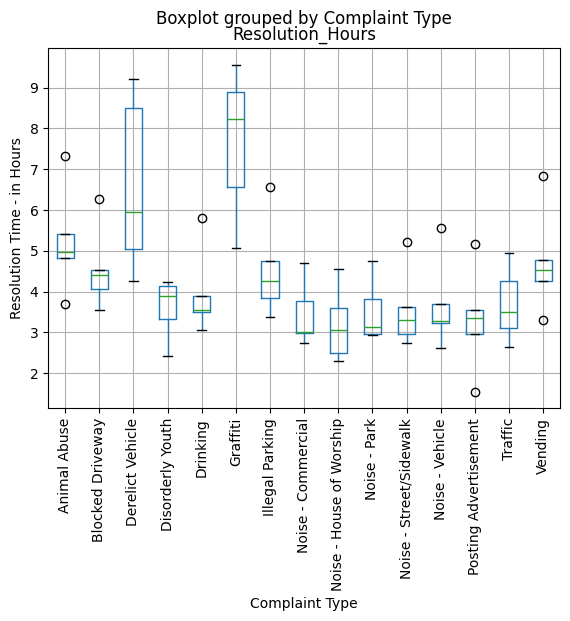

In [44]:
#box plot to check the homogenity of the data
plt.figure(figsize=(12, 6))
nyc_311_trend.boxplot('Resolution_Hours', by='Complaint Type', rot=90);
plt.xlabel('Complaint Type')
plt.ylabel('Resolution Time - in Hours')
plt.show();

<div style="background-color: #d4edda; font-size: 13px">Most complaints such as <b>Blocked Driveway</b>shows a larger spread suggesting higher variability whereas other complaints like <b>Illegal Parking</b> or <b>Noise - Street/Sidewalk</b> have smaller spreads, indicating lower variability.
So, The difference can be considered to be potentially not heterogenity.</div>

In [45]:
avg_close_time_per_complaint = nyc_311_trend.groupby('Complaint Type')['Resolution_Hours'].mean().reset_index()

In [46]:
avg_close_time_per_complaint

Complaint Type  Resolution_Hours
0               Animal Abuse          5.249941
1           Blocked Driveway          4.567469
2           Derelict Vehicle          6.593515
3           Disorderly Youth          3.608353
4                   Drinking          3.960020
5                   Graffiti          7.667284
6            Illegal Parking          4.563048
7         Noise - Commercial          3.439294
8   Noise - House of Worship          3.207019
9               Noise - Park          3.518090
10   Noise - Street/Sidewalk          3.571507
11           Noise - Vehicle          3.684481
12     Posting Advertisement          3.316889
13                   Traffic          3.693828
14                   Vending          4.738368

In [47]:
#an empty dictionary
complaint_groups = {}

#each complaint type is key and their correcponding response hour is value 
for complaint_type in avg_close_time_per_complaint['Complaint Type']:
    complaint_groups[complaint_type] = nyc_311_trend[nyc_311_trend['Complaint Type'] == complaint_type]['Resolution_Hours']

#astrek means all response time is tested 
f_statistic, p_value = stats.f_oneway(*complaint_groups.values())

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
if p_value < 0.05:
    print(" Reject Null Hypothesis (H0). There is a significant difference in average response times across complaint types.")
else:
    print("Accept Null Hypothesis (H0). There is no significant difference in average response times across complaint types.")

F-Statistic: 5.50332919744808
P-Value: 1.2470115528108694e-06
 Reject Null Hypothesis (H0). There is a significant difference in average response times across complaint types.


<div style="background-color: #d4edda; font-size: 13px">The <b>P-value as 1.2470115528108694 × 10⁻⁶</b> which is equivalent to <b>0.0000012470115528108694</b> means that the average response time is significantly diverse across multiple complaint types . This means the observed date is extremely unlikely to be under null hypothesis.</div>

<div style="background-color: none"></div>

-   <div style="font-size : 20px"><p><b>Test 2:</b> Whether the type of complaint or service requested and location are related</p></div>

<div style="background-color: white; font-size: 13px">The <b>Chi Square testing</b> is used in this case as the test 1 requires comparison of proportion is done across two different categorical data to check their dependency</div>
For this testing, we use complaint types and the Location Type to check whether they are related to each other.

Check valid categorical data 

In [61]:
#chi square testing is done to only categorical variables
nyc_311_trend['Complaint Type'] = nyc_311['Complaint Type'].astype('category')
nyc_311_trend['Location Type'] = nyc_311['Location Type'].astype('category')

In [62]:
#checking datatype for required variables
nyc_311_trend['Complaint Type'].dtype
nyc_311_trend['Location Type'].dtype

CategoricalDtype(categories=['Club/Bar/Restaurant', 'Commercial', 'Highway',
                  'House and Store', 'House of Worship', 'Park/Playground',
                  'Parking Lot', 'Residential Building',
                  'Residential Building/House', 'Roadway Tunnel',
                  'Store/Commercial', 'Street/Sidewalk', 'Subway Station',
                  'Vacant Lot'],
, ordered=False, categories_dtype=object)

<div style="background-color: #d4edda; font-size: 13px">The variable <b>Location Type</b> and <b>Complaint type</b> is converted to categorical data</div>

-  <div style="background-color: white; font-size: 13px"><b>Null Hypothesis (H0)</b> : The Variables Complaint type and location type are not related and are independent.</div>
-  <div style="background-color: white; font-size: 13px"><b>Alternative Hypothesis (H1)</b> : The Variables Complaint type and location type are related and are dependent.</div>

In [63]:
#to check the count of each categorical data
contingency_table = pd.crosstab(nyc_311_trend['Complaint Type'], nyc_311_trend['Location Type'])

In [64]:
contingency_table

Location Type             Club/Bar/Restaurant  House of Worship  \
Complaint Type                                                    
Blocked Driveway                            0                 0   
Derelict Vehicle                            0                 0   
Illegal Parking                             0                 0   
Noise - Commercial                         11                 0   
Noise - House of Worship                    0                 1   
Noise - Street/Sidewalk                     0                 0   
Posting Advertisement                       0                 0   

Location Type             Store/Commercial  Street/Sidewalk  
Complaint Type                                               
Blocked Driveway                         0               21  
Derelict Vehicle                         0                1  
Illegal Parking                          0               19  
Noise - Commercial                      10                0  
Noise - House of Worship                 0                0  
Noise - Street/Sidewalk                  0                6  
Posting Advertisement                    0                5

In [65]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [67]:
p

np.float64(1.8174319627394653e-22)

In [68]:
chi2

np.float64(148.00000000000006)

<div style="background-color: #d4edda; font-size: 13px">The <b>P-value as 1.8174319627394653e-22</b> which is equivalent to <b>0.000000000000000000000018174319627394653</b> means that the complaint type and location type are significantly related to each other . This means the observed date is extremely unlikely to be under null hypothesis.</div>

# =====================Thank You======================

<div style="background-color: none"></div>